In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from time import perf_counter
from time import process_time
# Import functions created for this course
import timeit

In [2]:
# loading the dataset to a pandas DataFrame 
df = pd.read_csv("/kaggle/input/dataer/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
target = 'Class'
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

In [4]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

# Correlation

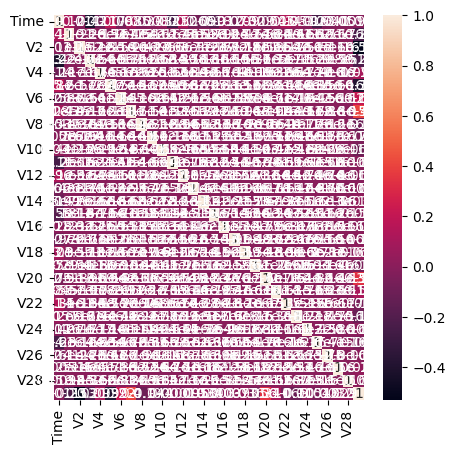

In [5]:
X.corr()

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(5,5))
cor = X.corr()
sns.heatmap(cor, annot=True)
plt.show()
def correlation(dataset, threshold):#dataset is X_train , threshold is a value which is may be 80% ,90% ,70%.. 
    col_corr = set()  # Set of all the names of correlated columns
    # using set() so no duplicate column contain here ...
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.6)

In [6]:
len(set(corr_features))

0

In [7]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
x_pca=pca.fit_transform(X)
x_pca

array([[ 0.41663045, -2.53266428, -0.67181138, ...,  0.11171417,
         0.14215877, -1.25024291],
       [-0.39345348, -2.0773255 , -0.53057713, ...,  0.3003576 ,
        -0.0465878 ,  0.39195207],
       [ 1.86852545, -2.53349699, -0.01952499, ...,  0.53762529,
         0.02562178, -1.80967301],
       ...,
       [-0.19406338,  2.07078798,  0.03345047, ..., -0.07893168,
        -0.73867713, -1.39138203],
       [-0.46608925,  1.22539363, -0.11097825, ...,  1.37262672,
        -1.25395377, -0.67343993],
       [ 0.76759651,  1.90590292,  0.09084575, ..., -0.06201774,
         0.24948179, -1.39996379]])

In [10]:
print(pca.explained_variance_ratio_)
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

[0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333]
92.13983457746552


# PC1 Vs PC2

In [11]:
'''# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])

# If you want to color the plot by the target class, include it
pca_df['Class'] = df['Class']

# Plotting PC1 vs PC2
plt.figure(figsize=(8,6),dpi=600)
classes = ['Non-fraud', 'Fraud']
colors = ['b', 'r']

for class_label, color in zip(classes, colors):
    indicesToKeep = pca_df['Class'] == classes.index(class_label)
    plt.scatter(pca_df.loc[indicesToKeep, 'PC1'], 
                pca_df.loc[indicesToKeep, 'PC2'], 
                c=color, s=50)
    
plt.title('PC1 vs PC2 after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(classes)
plt.grid()

plt.show()'''


"# Creating a DataFrame for the PCA results\npca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])\n\n# If you want to color the plot by the target class, include it\npca_df['Class'] = df['Class']\n\n# Plotting PC1 vs PC2\nplt.figure(figsize=(8,6),dpi=600)\nclasses = ['Non-fraud', 'Fraud']\ncolors = ['b', 'r']\n\nfor class_label, color in zip(classes, colors):\n    indicesToKeep = pca_df['Class'] == classes.index(class_label)\n    plt.scatter(pca_df.loc[indicesToKeep, 'PC1'], \n                pca_df.loc[indicesToKeep, 'PC2'], \n                c=color, s=50)\n    \nplt.title('PC1 vs PC2 after PCA')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(classes)\nplt.grid()\n\nplt.show()"

In [12]:
#principal_cifar_Df.head()


In [13]:
total_var

92.13983457746552

In [14]:
pca.explained_variance_

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351])

In [15]:
pca.components_

array([[-2.96469381e-002, -1.71551708e-001, -3.91550227e-001,
        -1.42527692e-001,  7.60644765e-002, -2.90266052e-001,
         1.61221068e-001,  2.90369129e-001, -7.48706686e-002,
        -3.23601835e-002, -7.57981588e-002,  7.73979574e-003,
        -1.08835632e-002,  5.94243378e-003,  2.79445747e-002,
         3.47389435e-003, -3.25126610e-003,  7.65762160e-003,
         2.34916899e-002, -4.23038385e-002,  2.51860652e-001,
         7.67829506e-002, -5.22430310e-002, -8.46411154e-002,
         4.29562695e-003, -2.80652214e-002, -1.08463906e-003,
         2.14156758e-002,  7.85595056e-003,  7.06648939e-001],
       [ 7.06467241e-001,  1.12951322e-001, -3.04452610e-002,
        -4.41333161e-001, -1.05143553e-001,  1.64660368e-001,
        -5.71904595e-002,  1.02114748e-001, -4.19624871e-002,
        -1.05724167e-002,  2.79120063e-002, -2.55935941e-001,
         1.28139875e-001, -6.79029306e-002, -1.00807885e-001,
        -1.89673502e-001,  1.21558889e-002, -7.54704876e-002,
       

In [16]:
explained_variance = pca.explained_variance_
explained_variance

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351])

In [17]:
pca.n_components

0.9

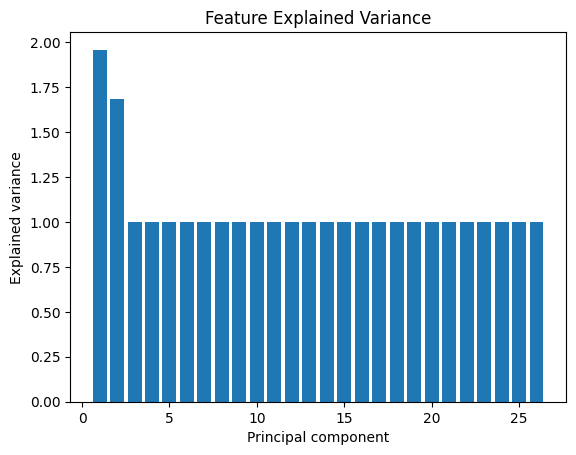

[1.95826326 1.6836999  1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351]


In [18]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()
print(pca.explained_variance_)

cumulative_var_ratio [0.06527521 0.12139835 0.15473168 0.18806501 0.22139835 0.25473168
 0.28806501 0.32139835 0.35473168 0.38806501 0.42139835 0.45473168
 0.48806501 0.52139835 0.55473168 0.58806501 0.62139835 0.65473168
 0.68806501 0.72139835 0.75473168 0.78806501 0.82139835 0.85473168
 0.88806501 0.92139835]


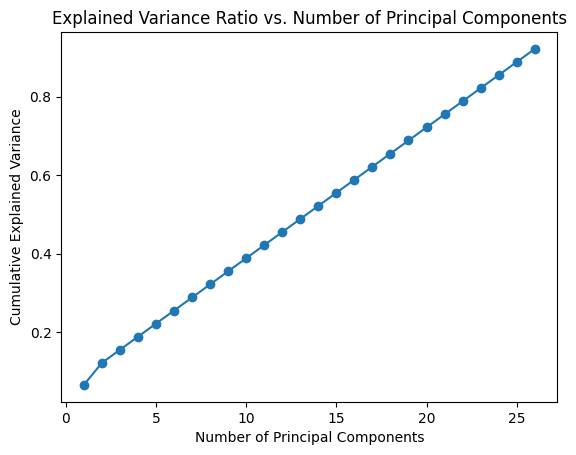

<Figure size 100x100 with 0 Axes>

In [19]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
print('cumulative_var_ratio',cumulative_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.figure(figsize=(1,1))
plt.show()

In [20]:
pca.n_components_

26

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=30)

In [22]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X_train=x_train_res
Y_train=y_train_res

In [23]:
X_train

array([[-0.45208557, -0.91050733, -0.78460552, ..., -0.33305411,
         0.8168877 , -0.02672252],
       [-0.22496909,  1.60053674, -0.46068735, ...,  0.60550074,
         0.10243859,  0.57476   ],
       [-0.45497005,  1.3772829 , -0.12417348, ..., -2.23755424,
         1.31895433, -0.7522609 ],
       ...,
       [-0.21474802, -0.01847791,  2.52739055, ...,  3.25901347,
         0.85798546,  0.81846664],
       [-0.40775234, -2.34359485,  9.41422066, ...,  7.49806194,
        -2.45297205,  3.89794903],
       [-0.95469629,  1.68534715,  5.47835065, ...,  6.62559194,
         3.10908225,  1.50040785]])

In [24]:
Y_train

,Class
0,0
1,0
2,0
3,0
4,0
...,...
454925,1
454926,1
454927,1
454928,1


# XGBoost

Elapsed time :  4.5318237110000155
Accuracy on Training data : ,  1.0
Elapsed time :  0.5645292309999945
Accuracy score on Test data : 0.9992977774656788
Accuracy =  0.9992977774656788
Precision =  0.8272727272727273
Recall =  0.8125
F1 Score =  0.8198198198198199
[[56831    21]
 [   19    91]]


<Axes: >

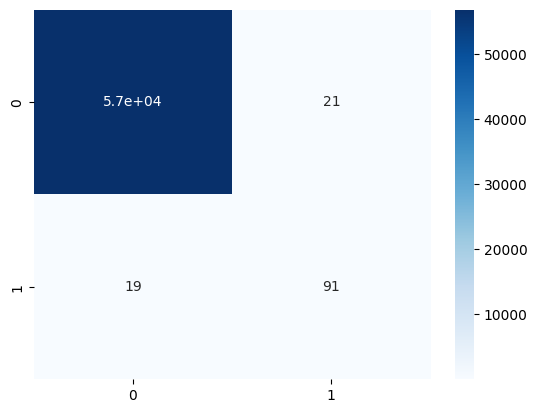

In [25]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree= 1 , gamma = 0 , max_depth= 12, min_child_weight= 1, n_estimators=1750, reg_alpha= 0, reg_lambda= 0, seed= 0)
start_time =timeit.default_timer()
model.fit(X_train, Y_train)


#Accuracy on training data
start_time =timeit.default_timer()
x_train_prediction = model.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time =timeit.default_timer()
x_test_prediction = model.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

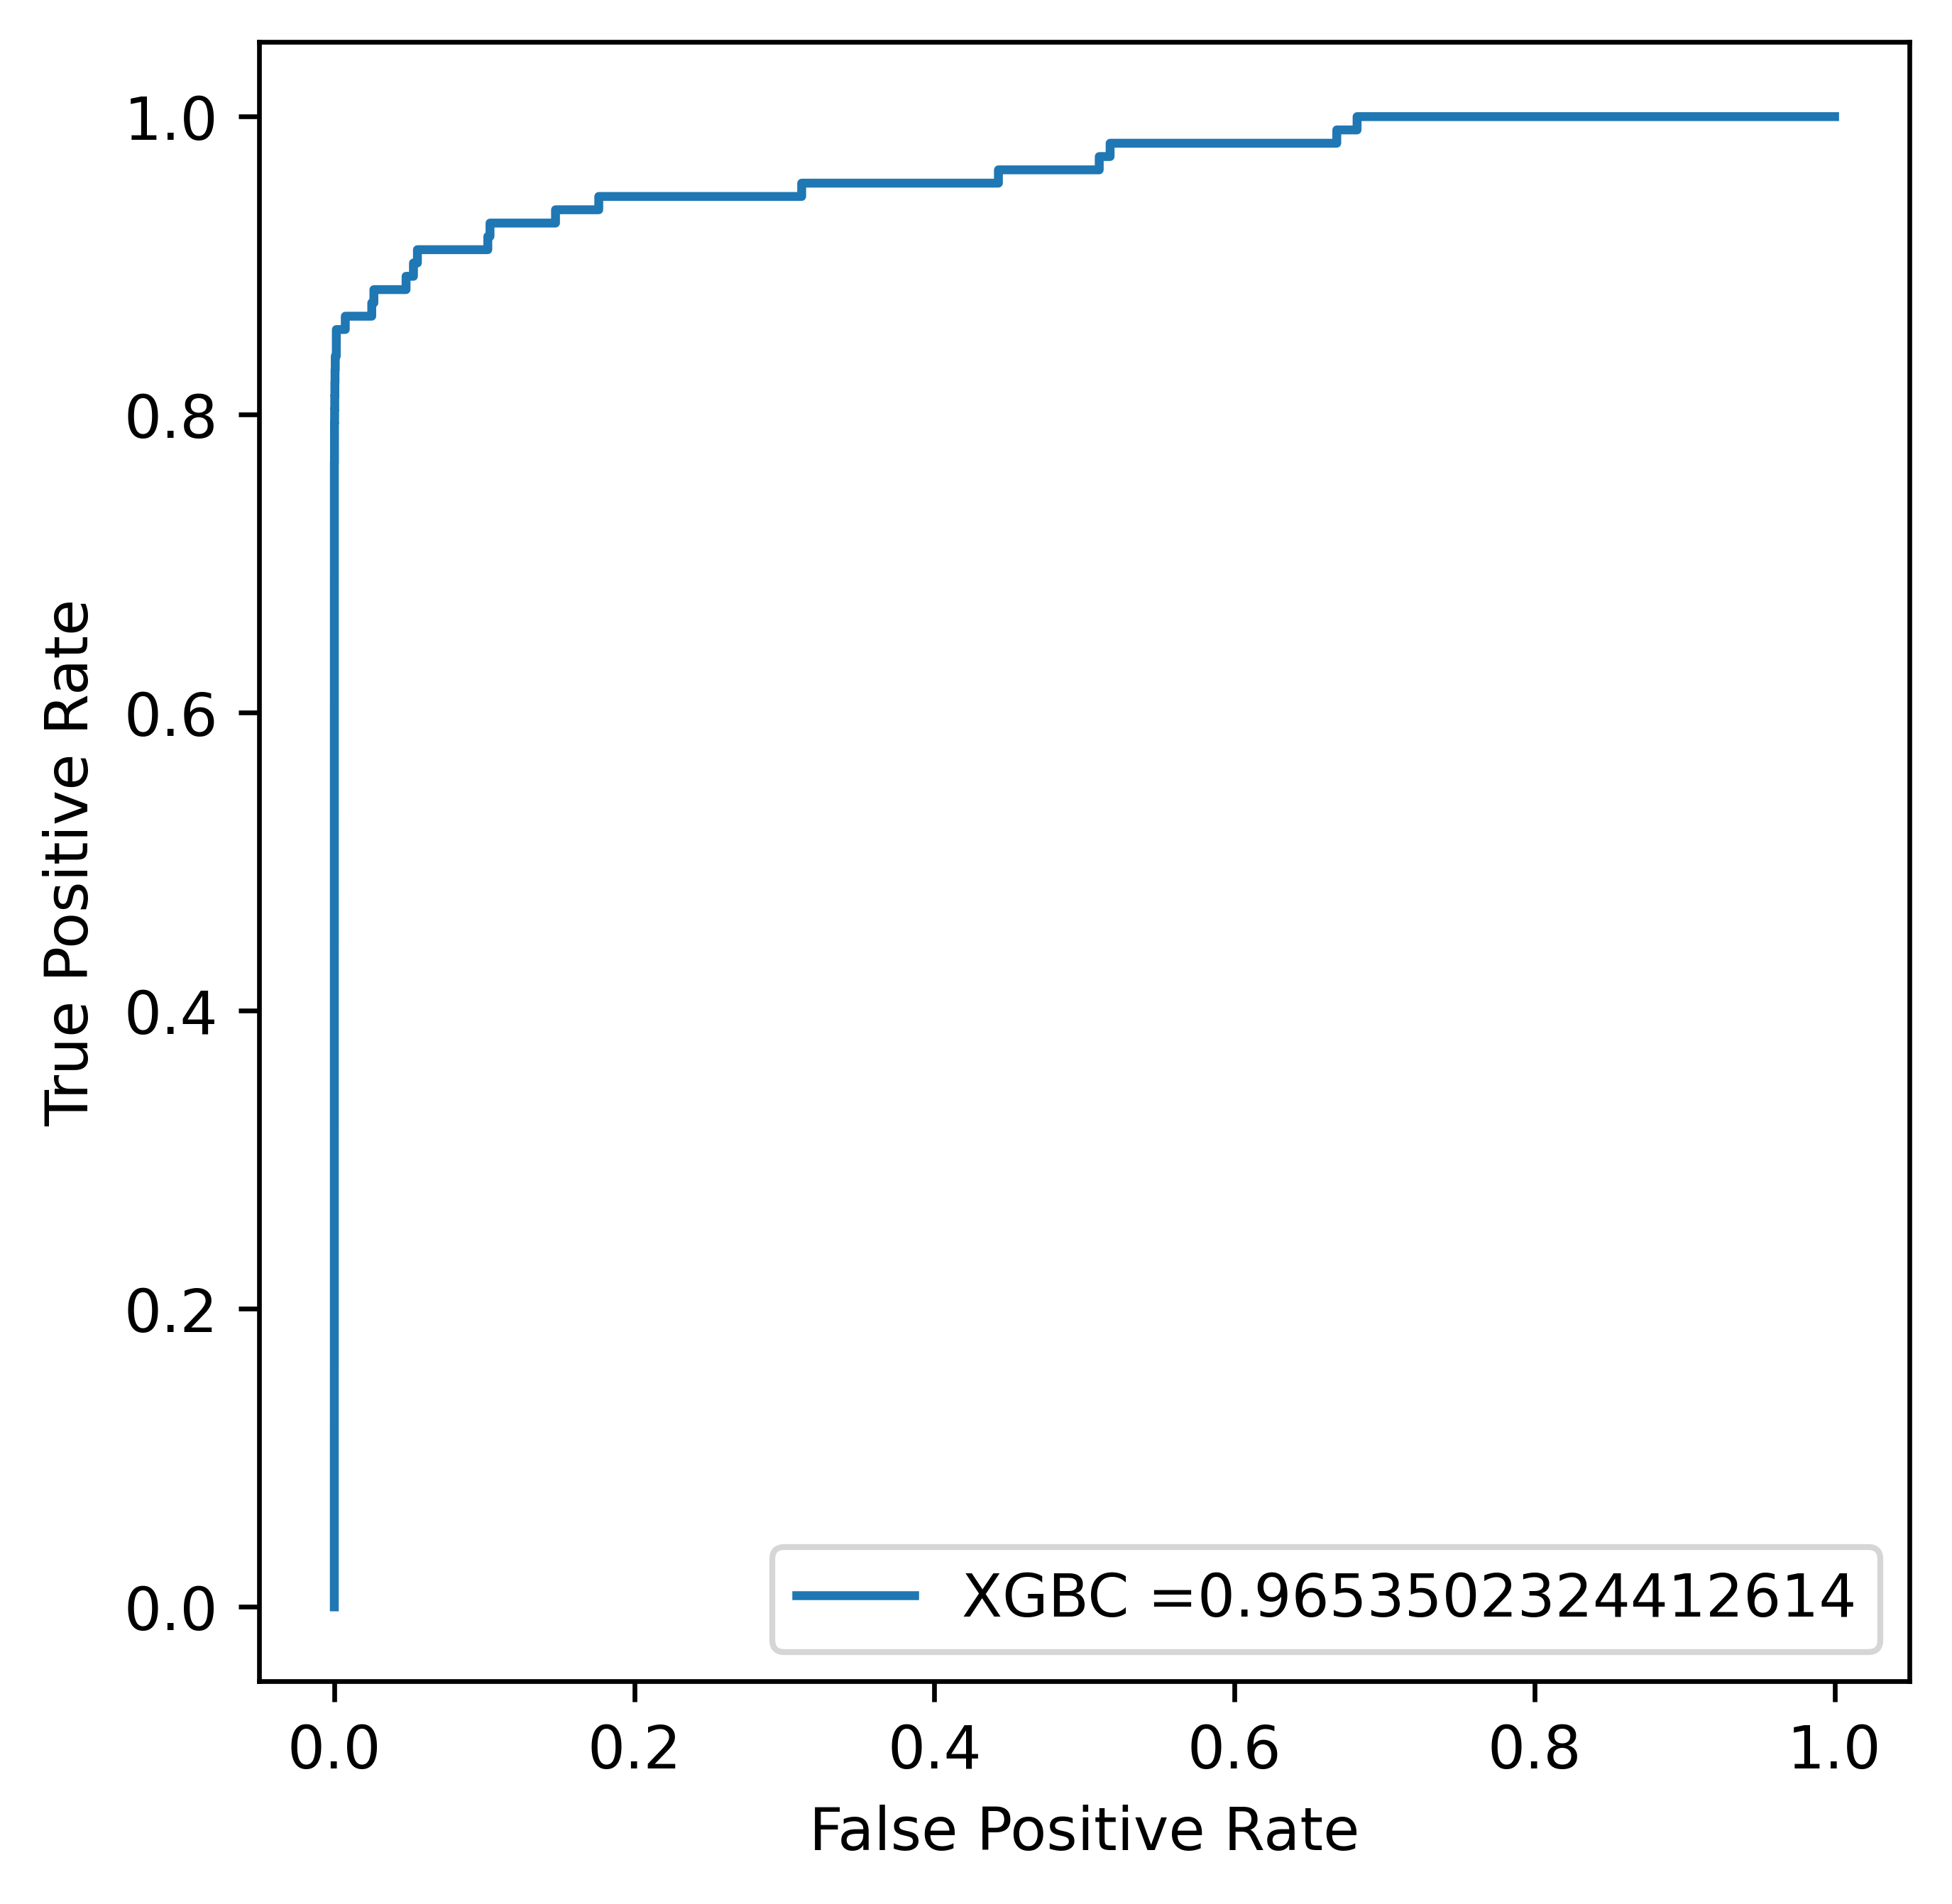

In [29]:
    y_pred_proba_dt = model.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    plt.figure(figsize=(5, 5), dpi=600)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="XGBC ="+str(auc_dt))
    
    plt.legend(loc=4)
    plt.show()

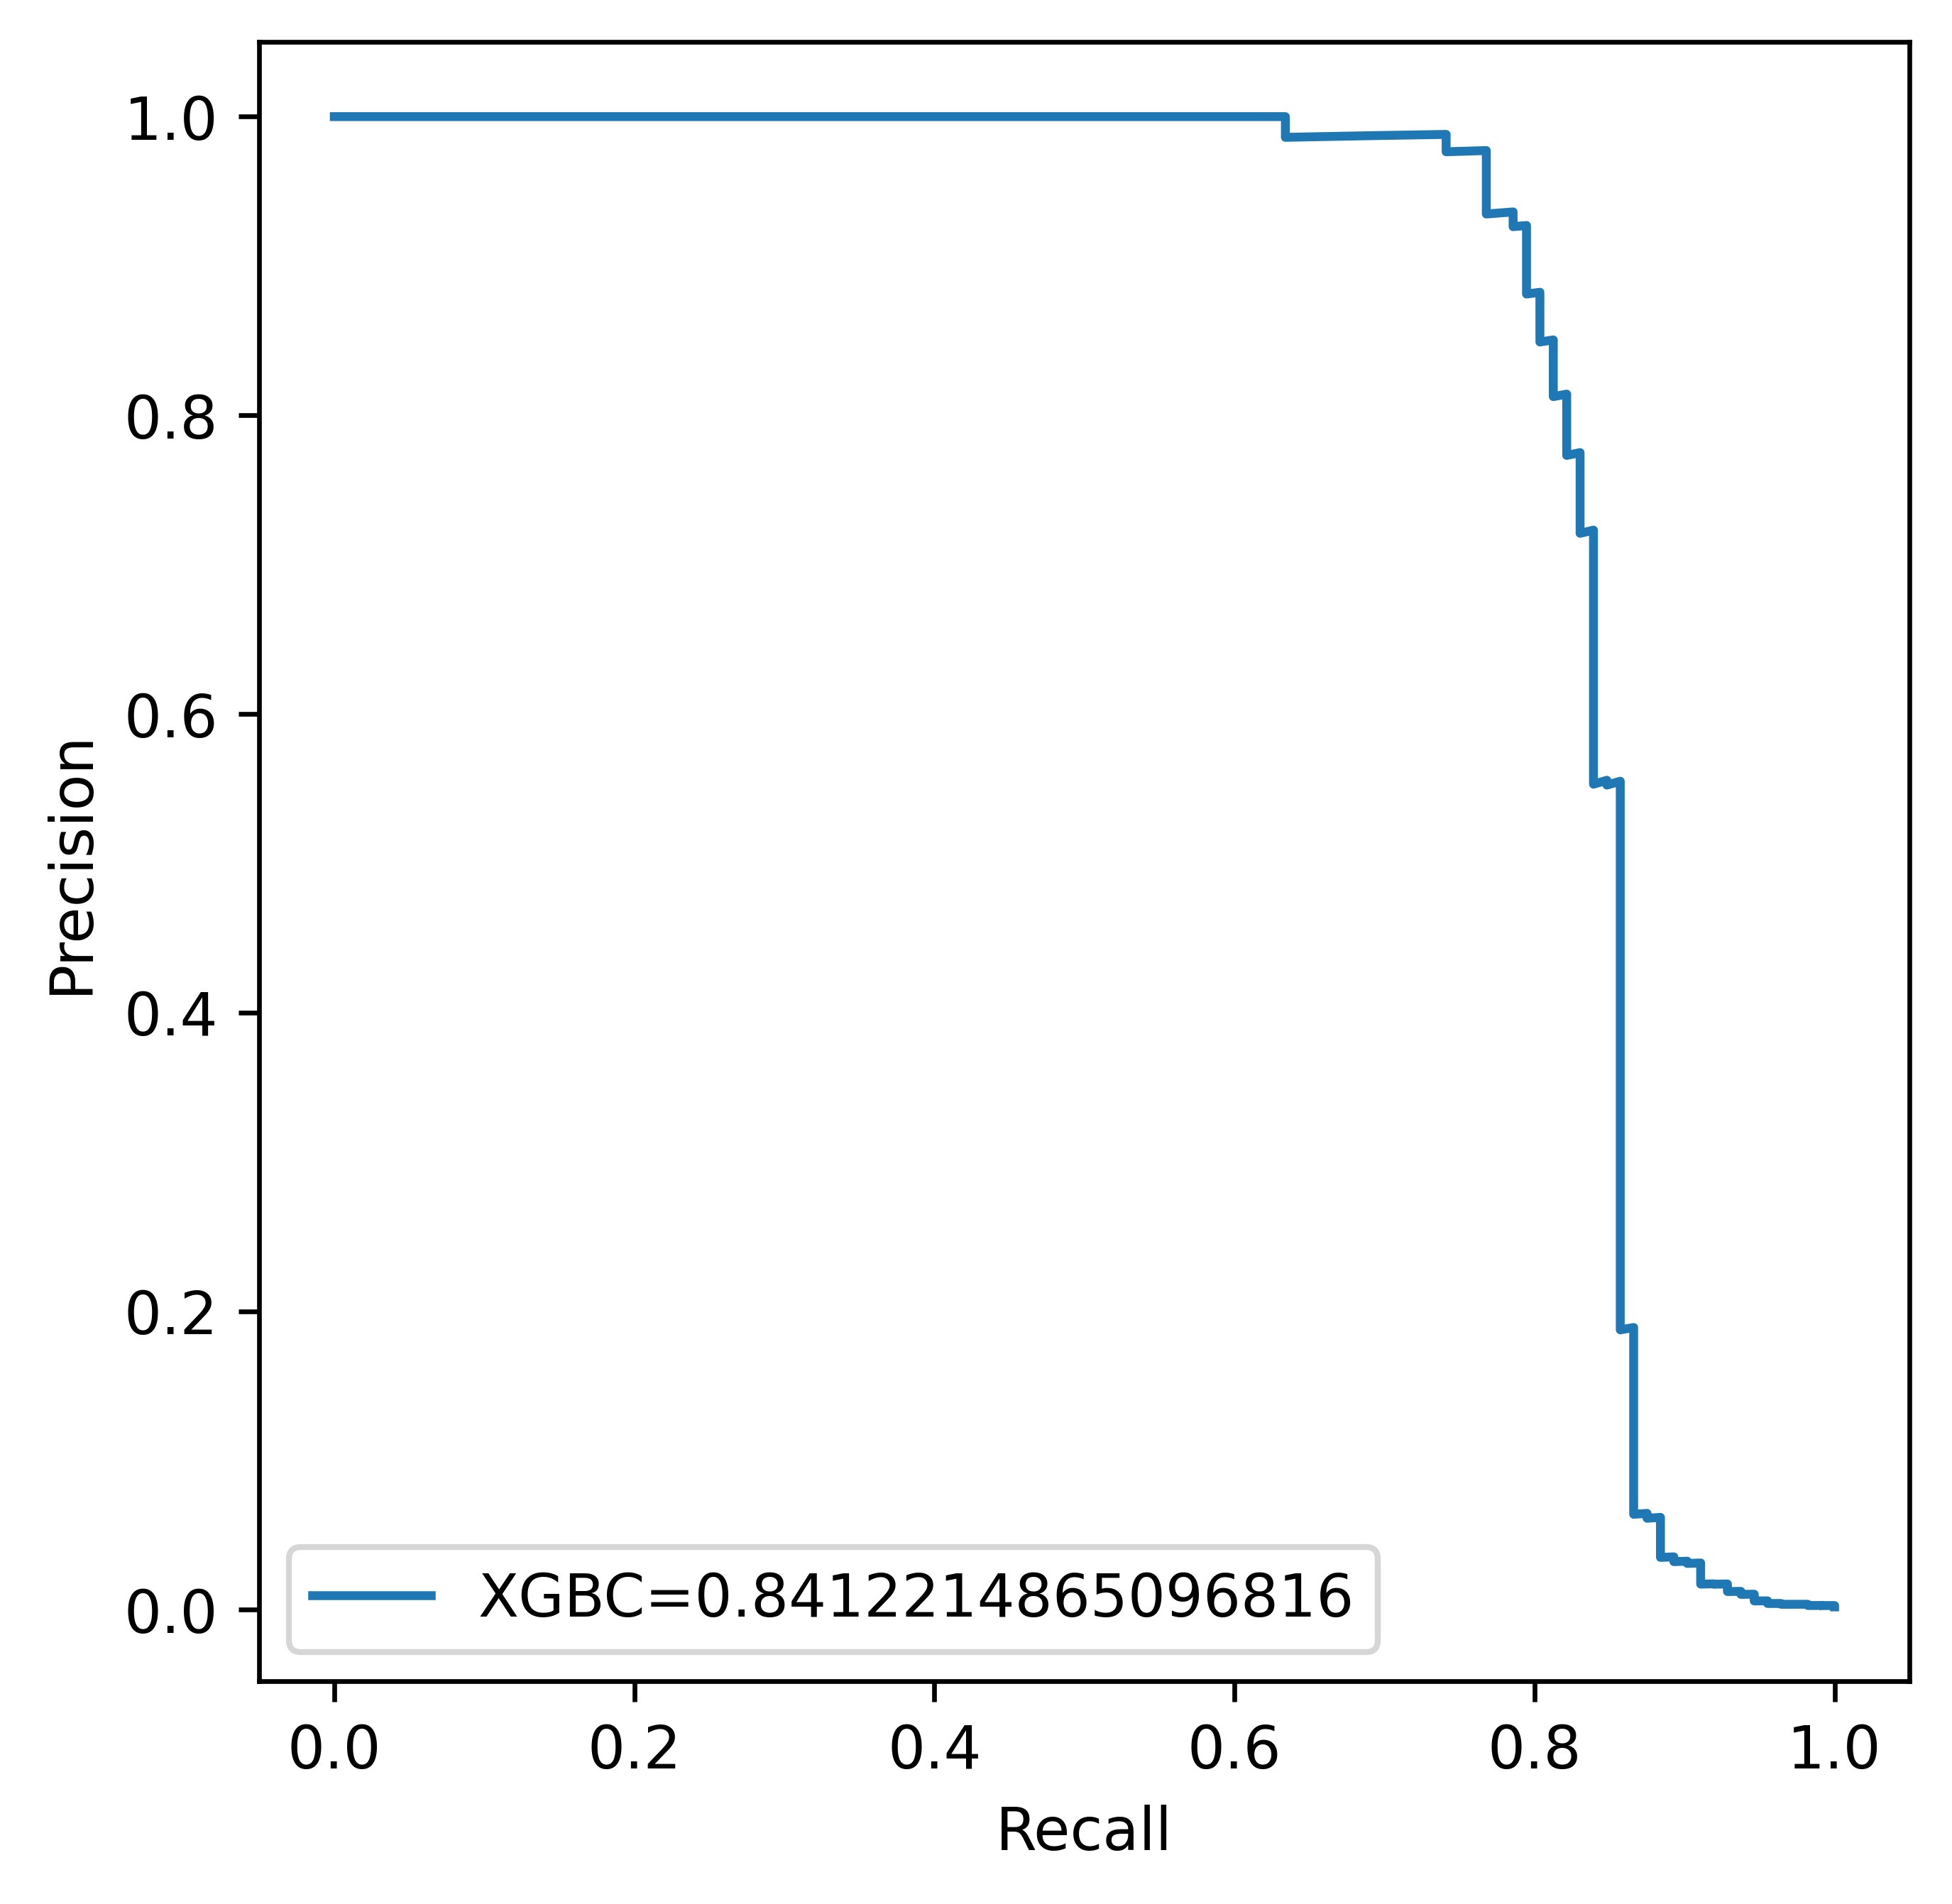

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=model.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
plt.figure(figsize=(5, 5), dpi=600)

plt.plot(recall_rf, precision_rf, marker='',label="XGBC="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.show()

# Random Forest 

/tmp/ipykernel_36/107583418.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Elapsed time :  1.7586284490000708
Accuracy on Training data : ,  1.0
Elapsed time :  0.24219171300001108
Accuracy score on Test data : 0.999385555282469
Accuracy =  0.999385555282469
Precision =  0.8888888888888888
Recall =  0.7857142857142857
F1 Score =  0.8341232227488152
[[56839    24]
 [   11    88]]


<Axes: >

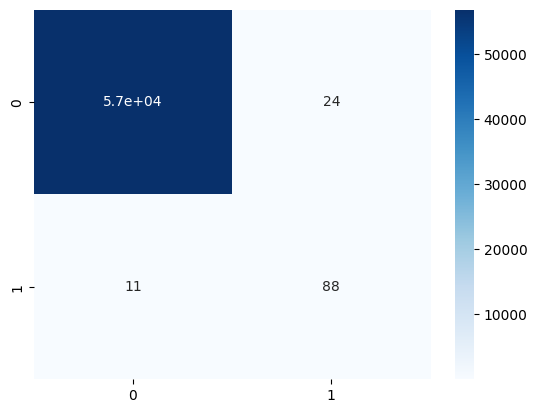

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4, random_state=2018,criterion='gini',n_estimators=100,verbose=False)

rf.fit(X_train, Y_train)


start_time = timeit.default_timer()

x_train_prediction = rf.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()
x_test_prediction = rf.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)

cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

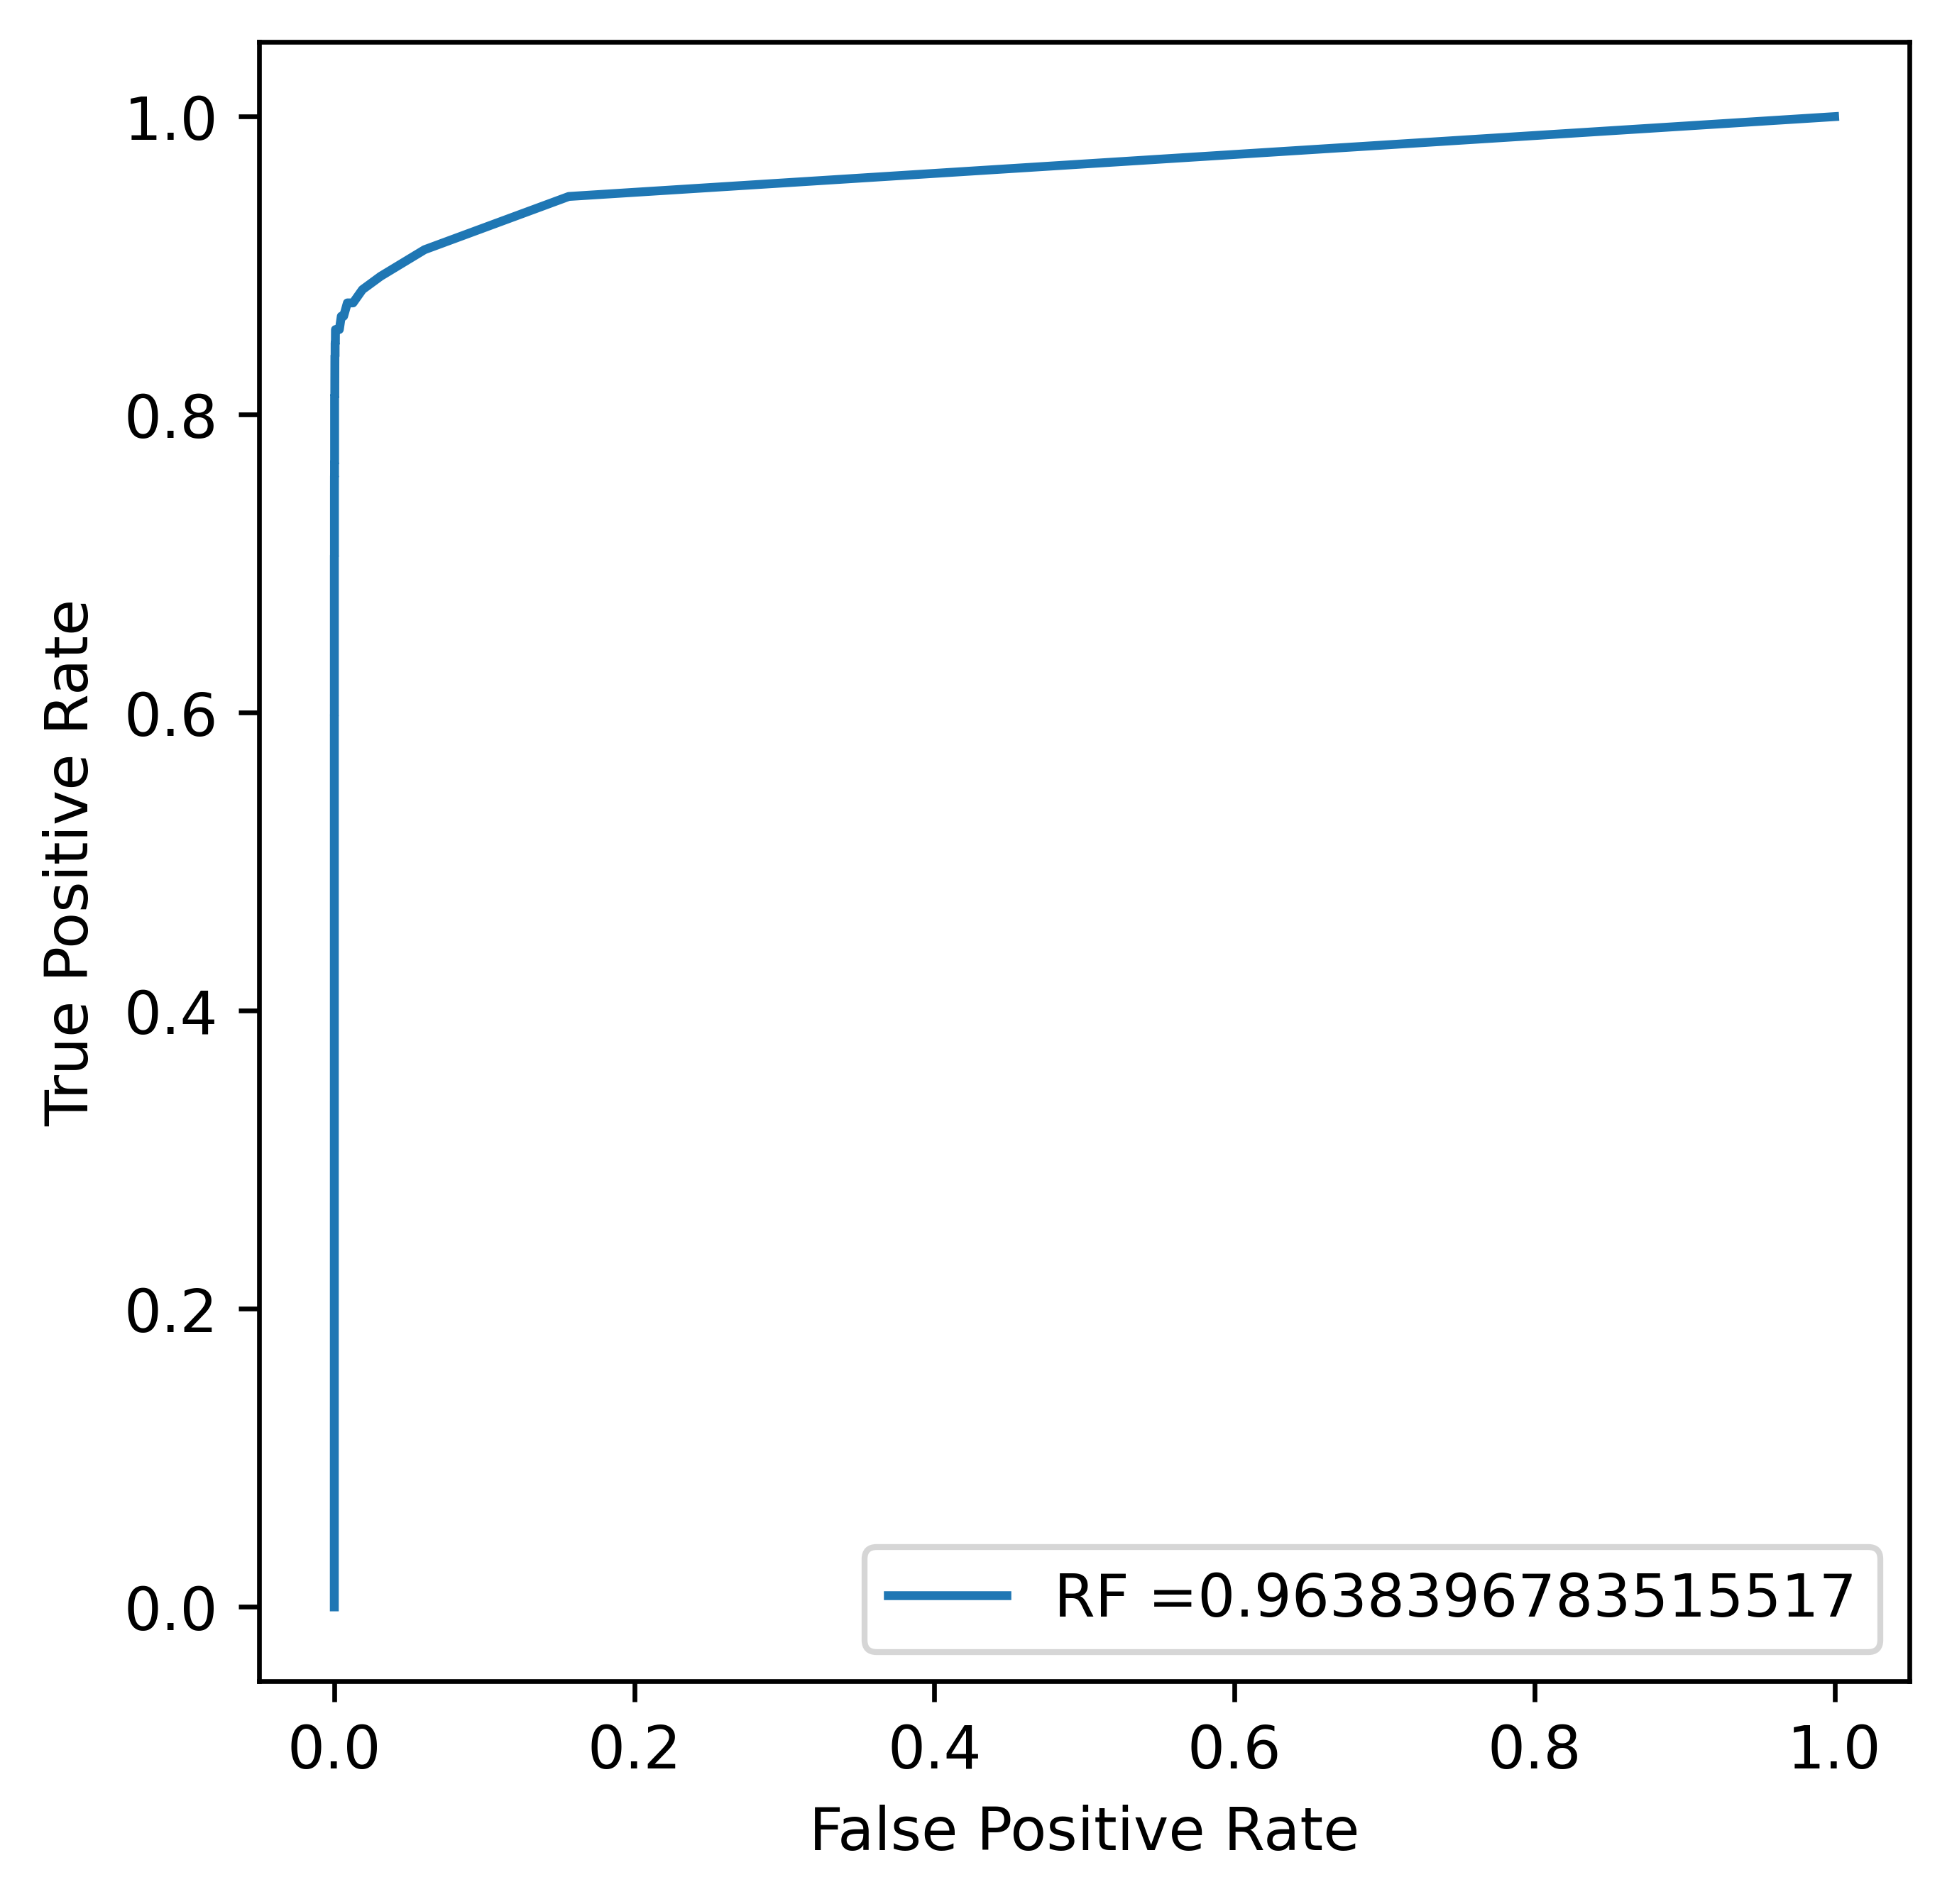

In [32]:
    y_pred_proba_dt = rf.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    plt.figure(figsize=(5, 5), dpi=600)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="RF ="+str(auc_dt))
    
    plt.legend(loc=4)
    plt.show()

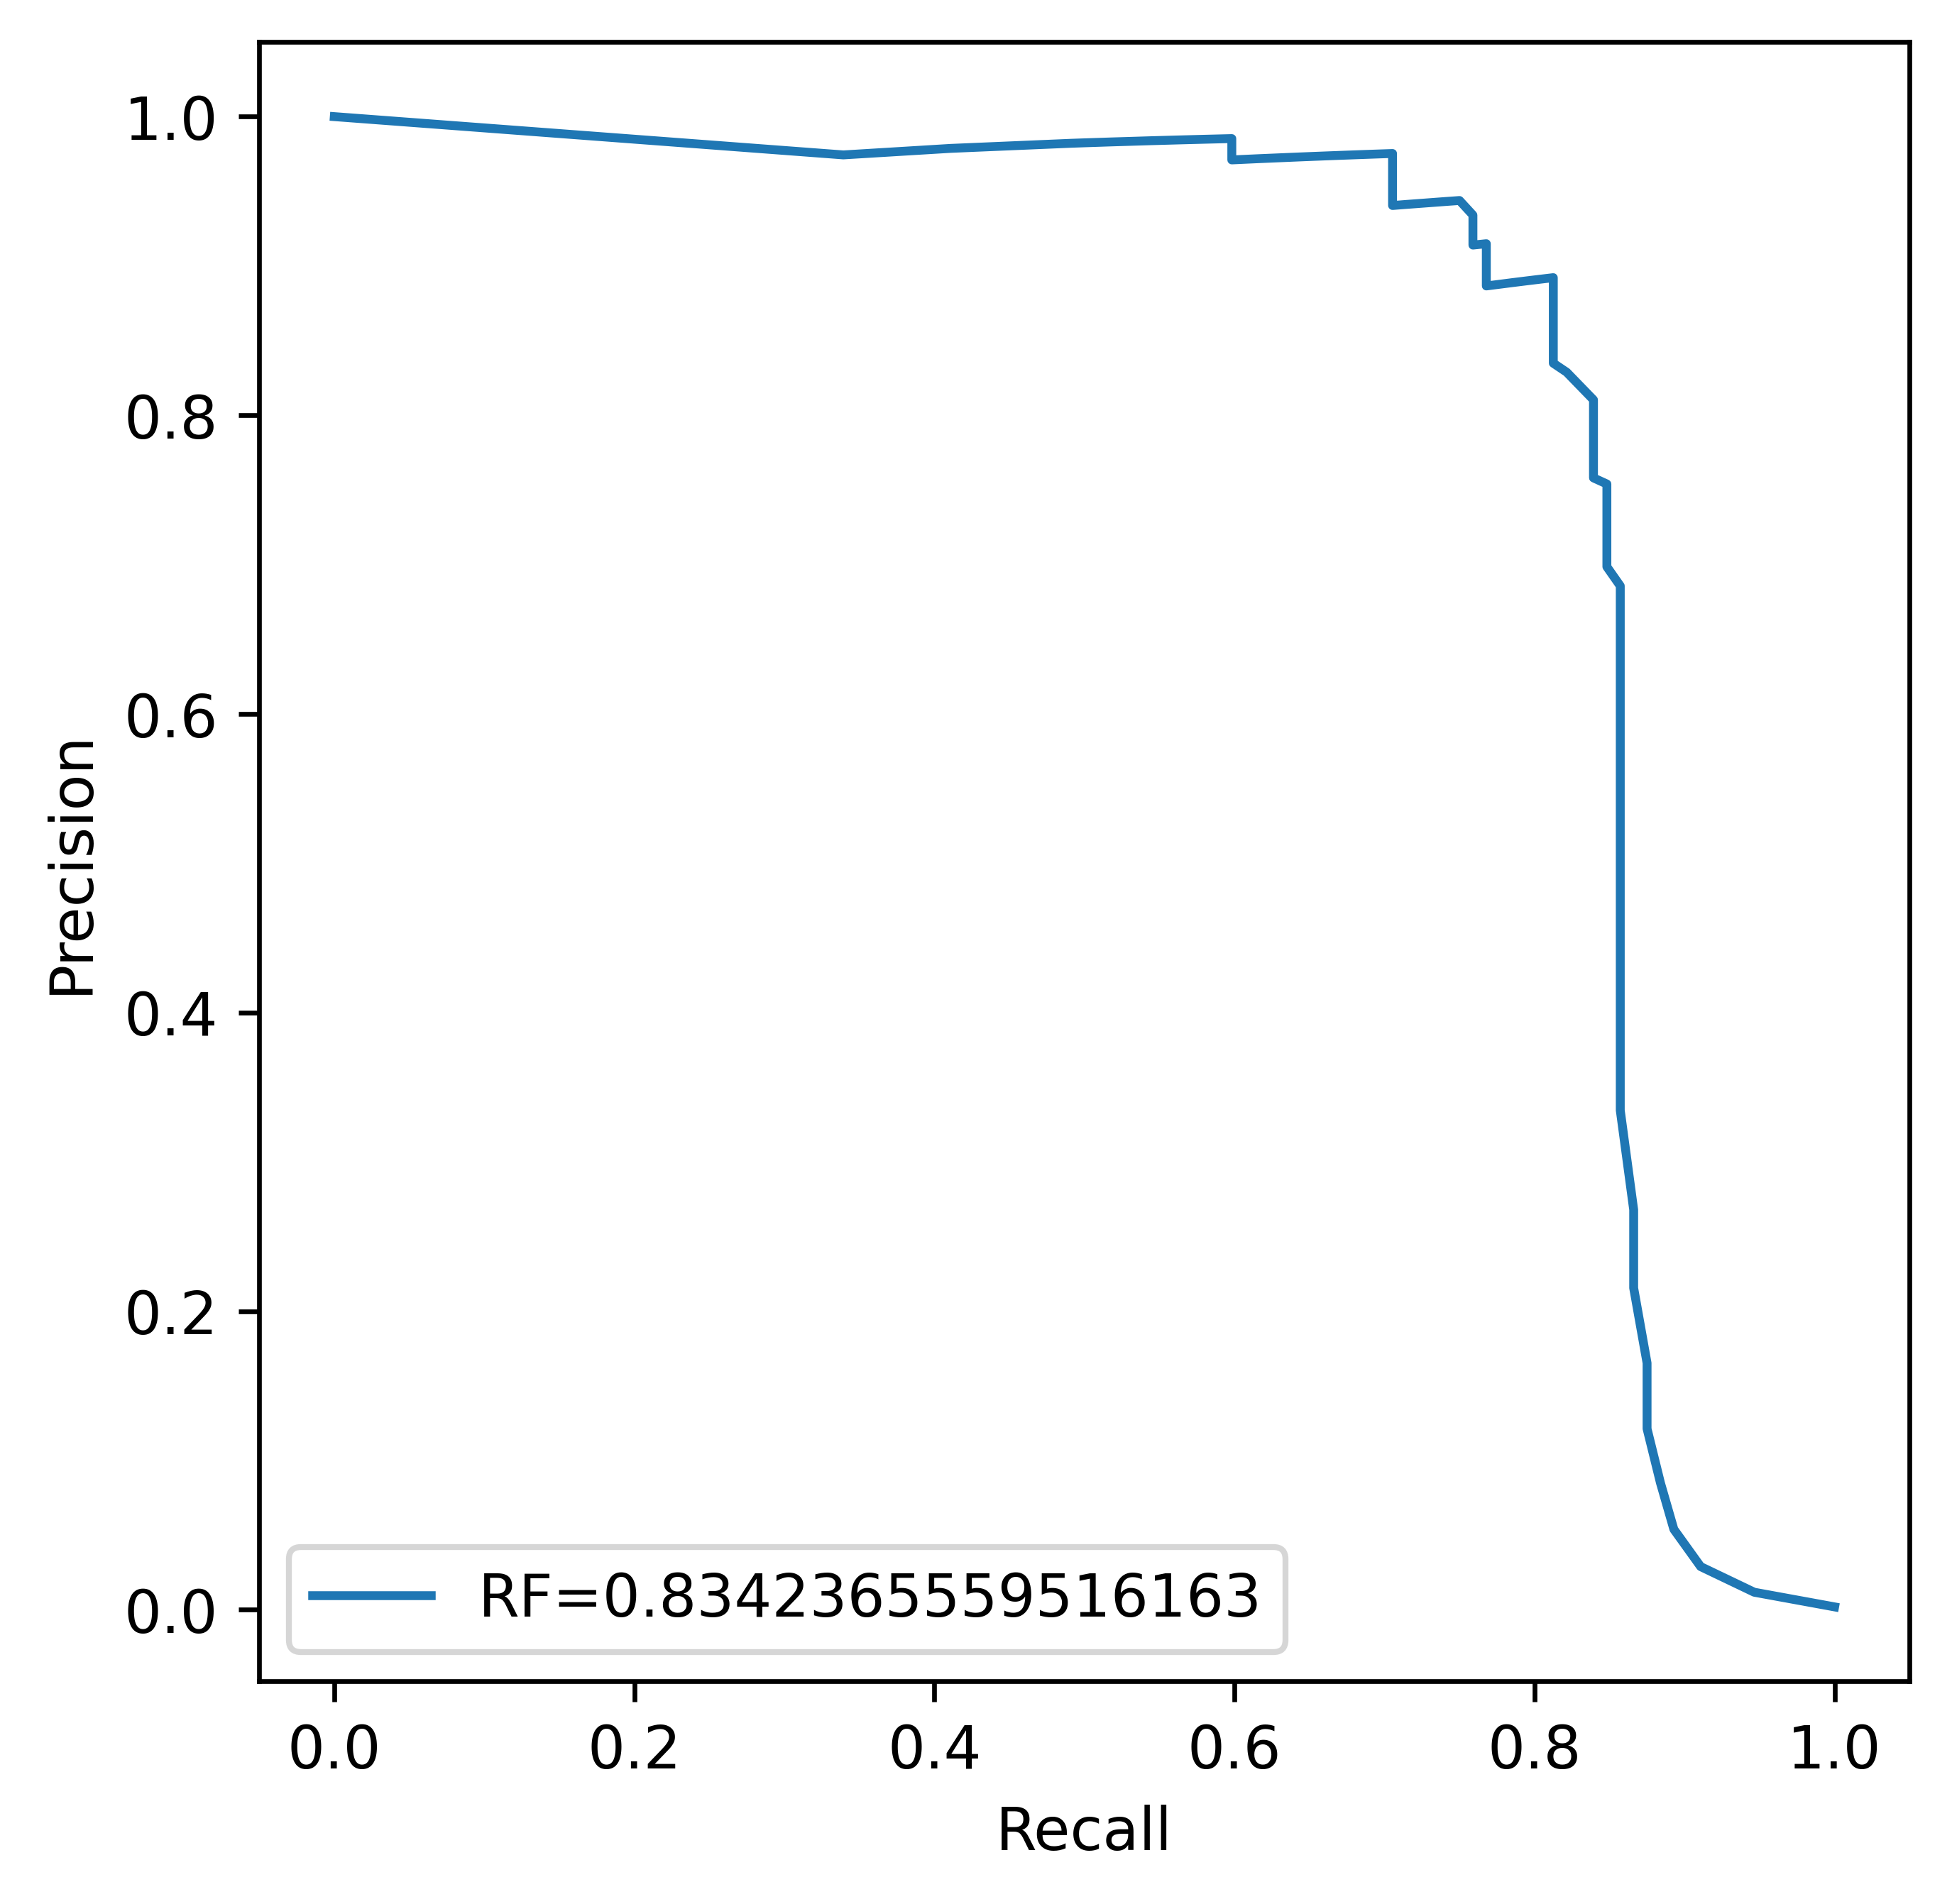

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
plt.figure(figsize=(5, 5), dpi=600)

plt.plot(recall_rf, precision_rf, marker='',label="RF="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.show()

Elapsed time :  0.06219538999994256
Accuracy on Training data : ,  0.9998307431912602
Elapsed time :  0.006690970999898127
Accuracy score on Test data : 0.9979635546504687
Accuracy =  0.9979635546504687
Precision =  0.4883720930232558
Recall =  0.75
F1 Score =  0.5915492957746479
[[56762    28]
 [   88    84]]


<Axes: >

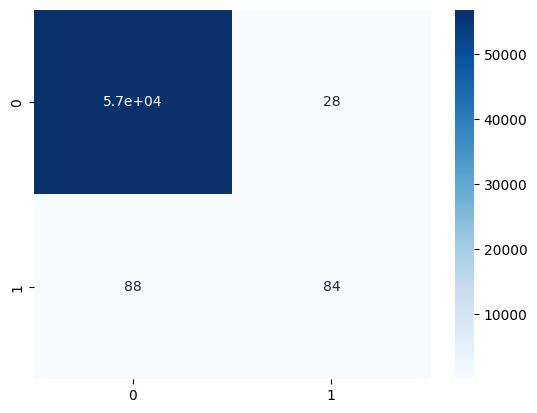

In [34]:
from sklearn import tree
classify_ = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 37, min_samples_leaf= 2, min_samples_split= 3,max_features=15,max_leaf_nodes=1200,splitter='best')


classify_ = classify_.fit(X_train,Y_train)



#Accuracy on training data
start_time = timeit.default_timer()
x_train_prediction = classify_.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()
x_test_prediction = classify_.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)


cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

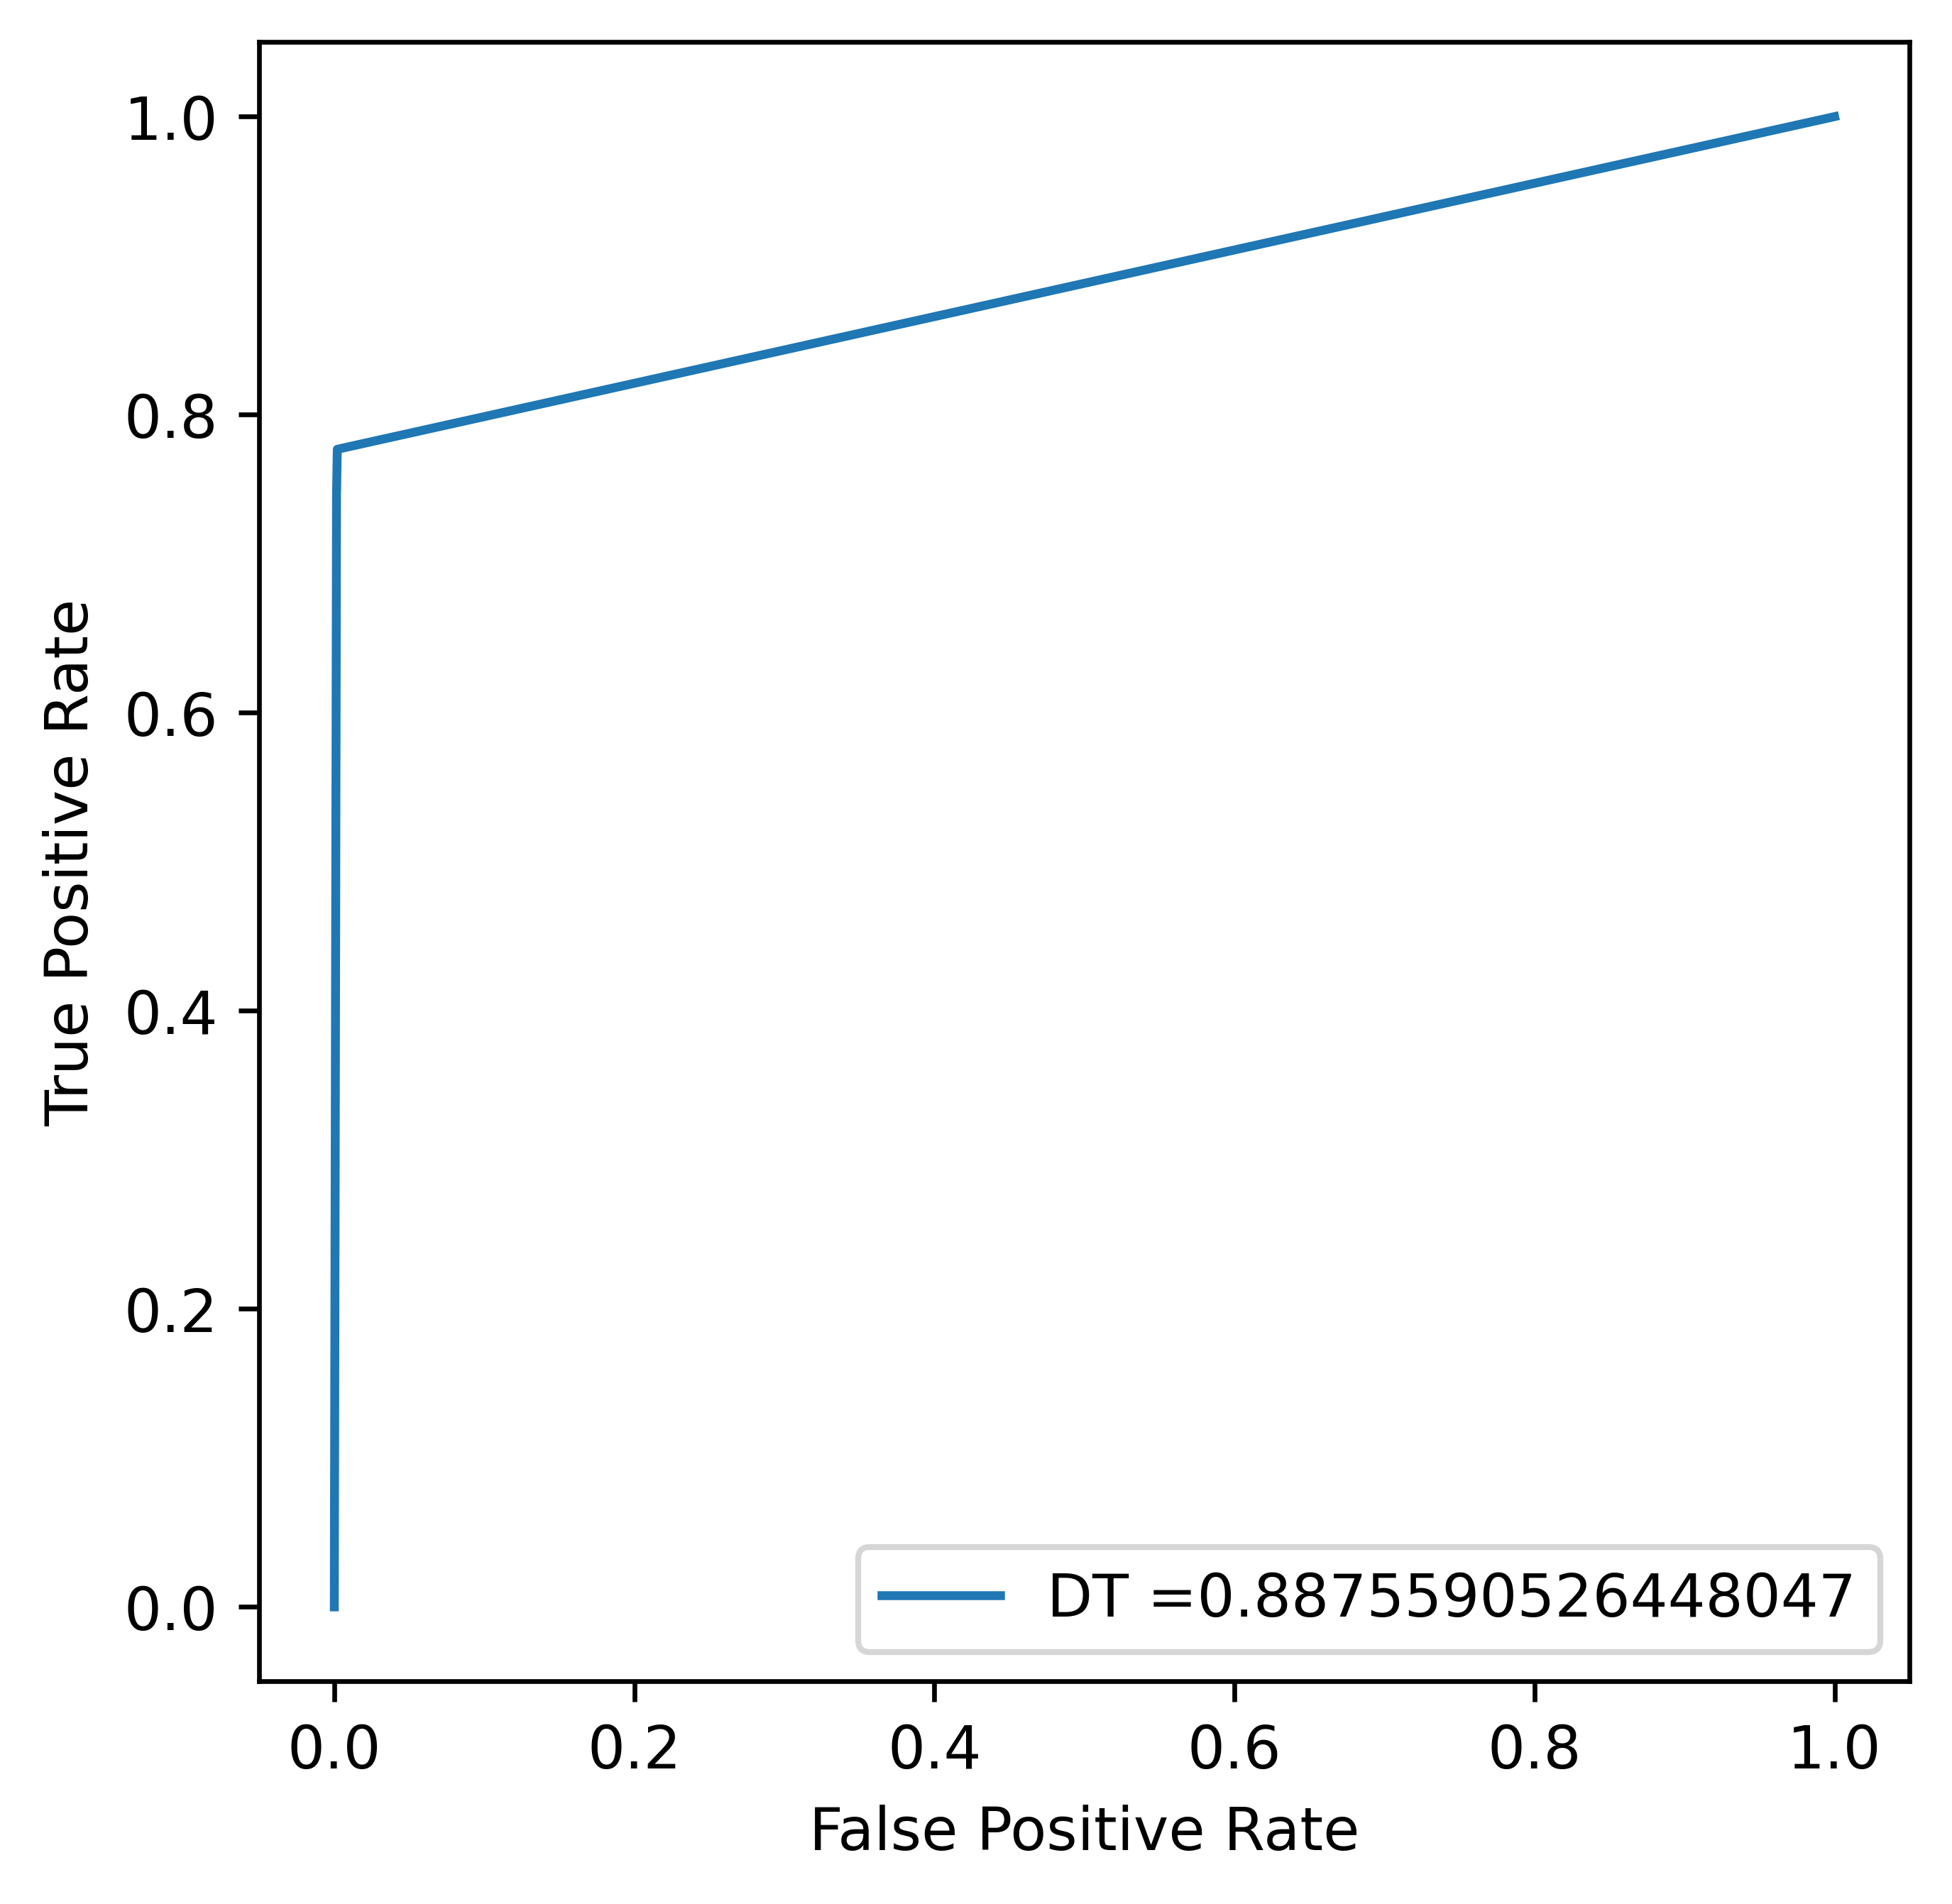

In [35]:
    y_pred_proba_dt = classify_.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    plt.figure(figsize=(5, 5), dpi=600)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="DT ="+str(auc_dt))
    
    plt.legend(loc=4)
    plt.show()

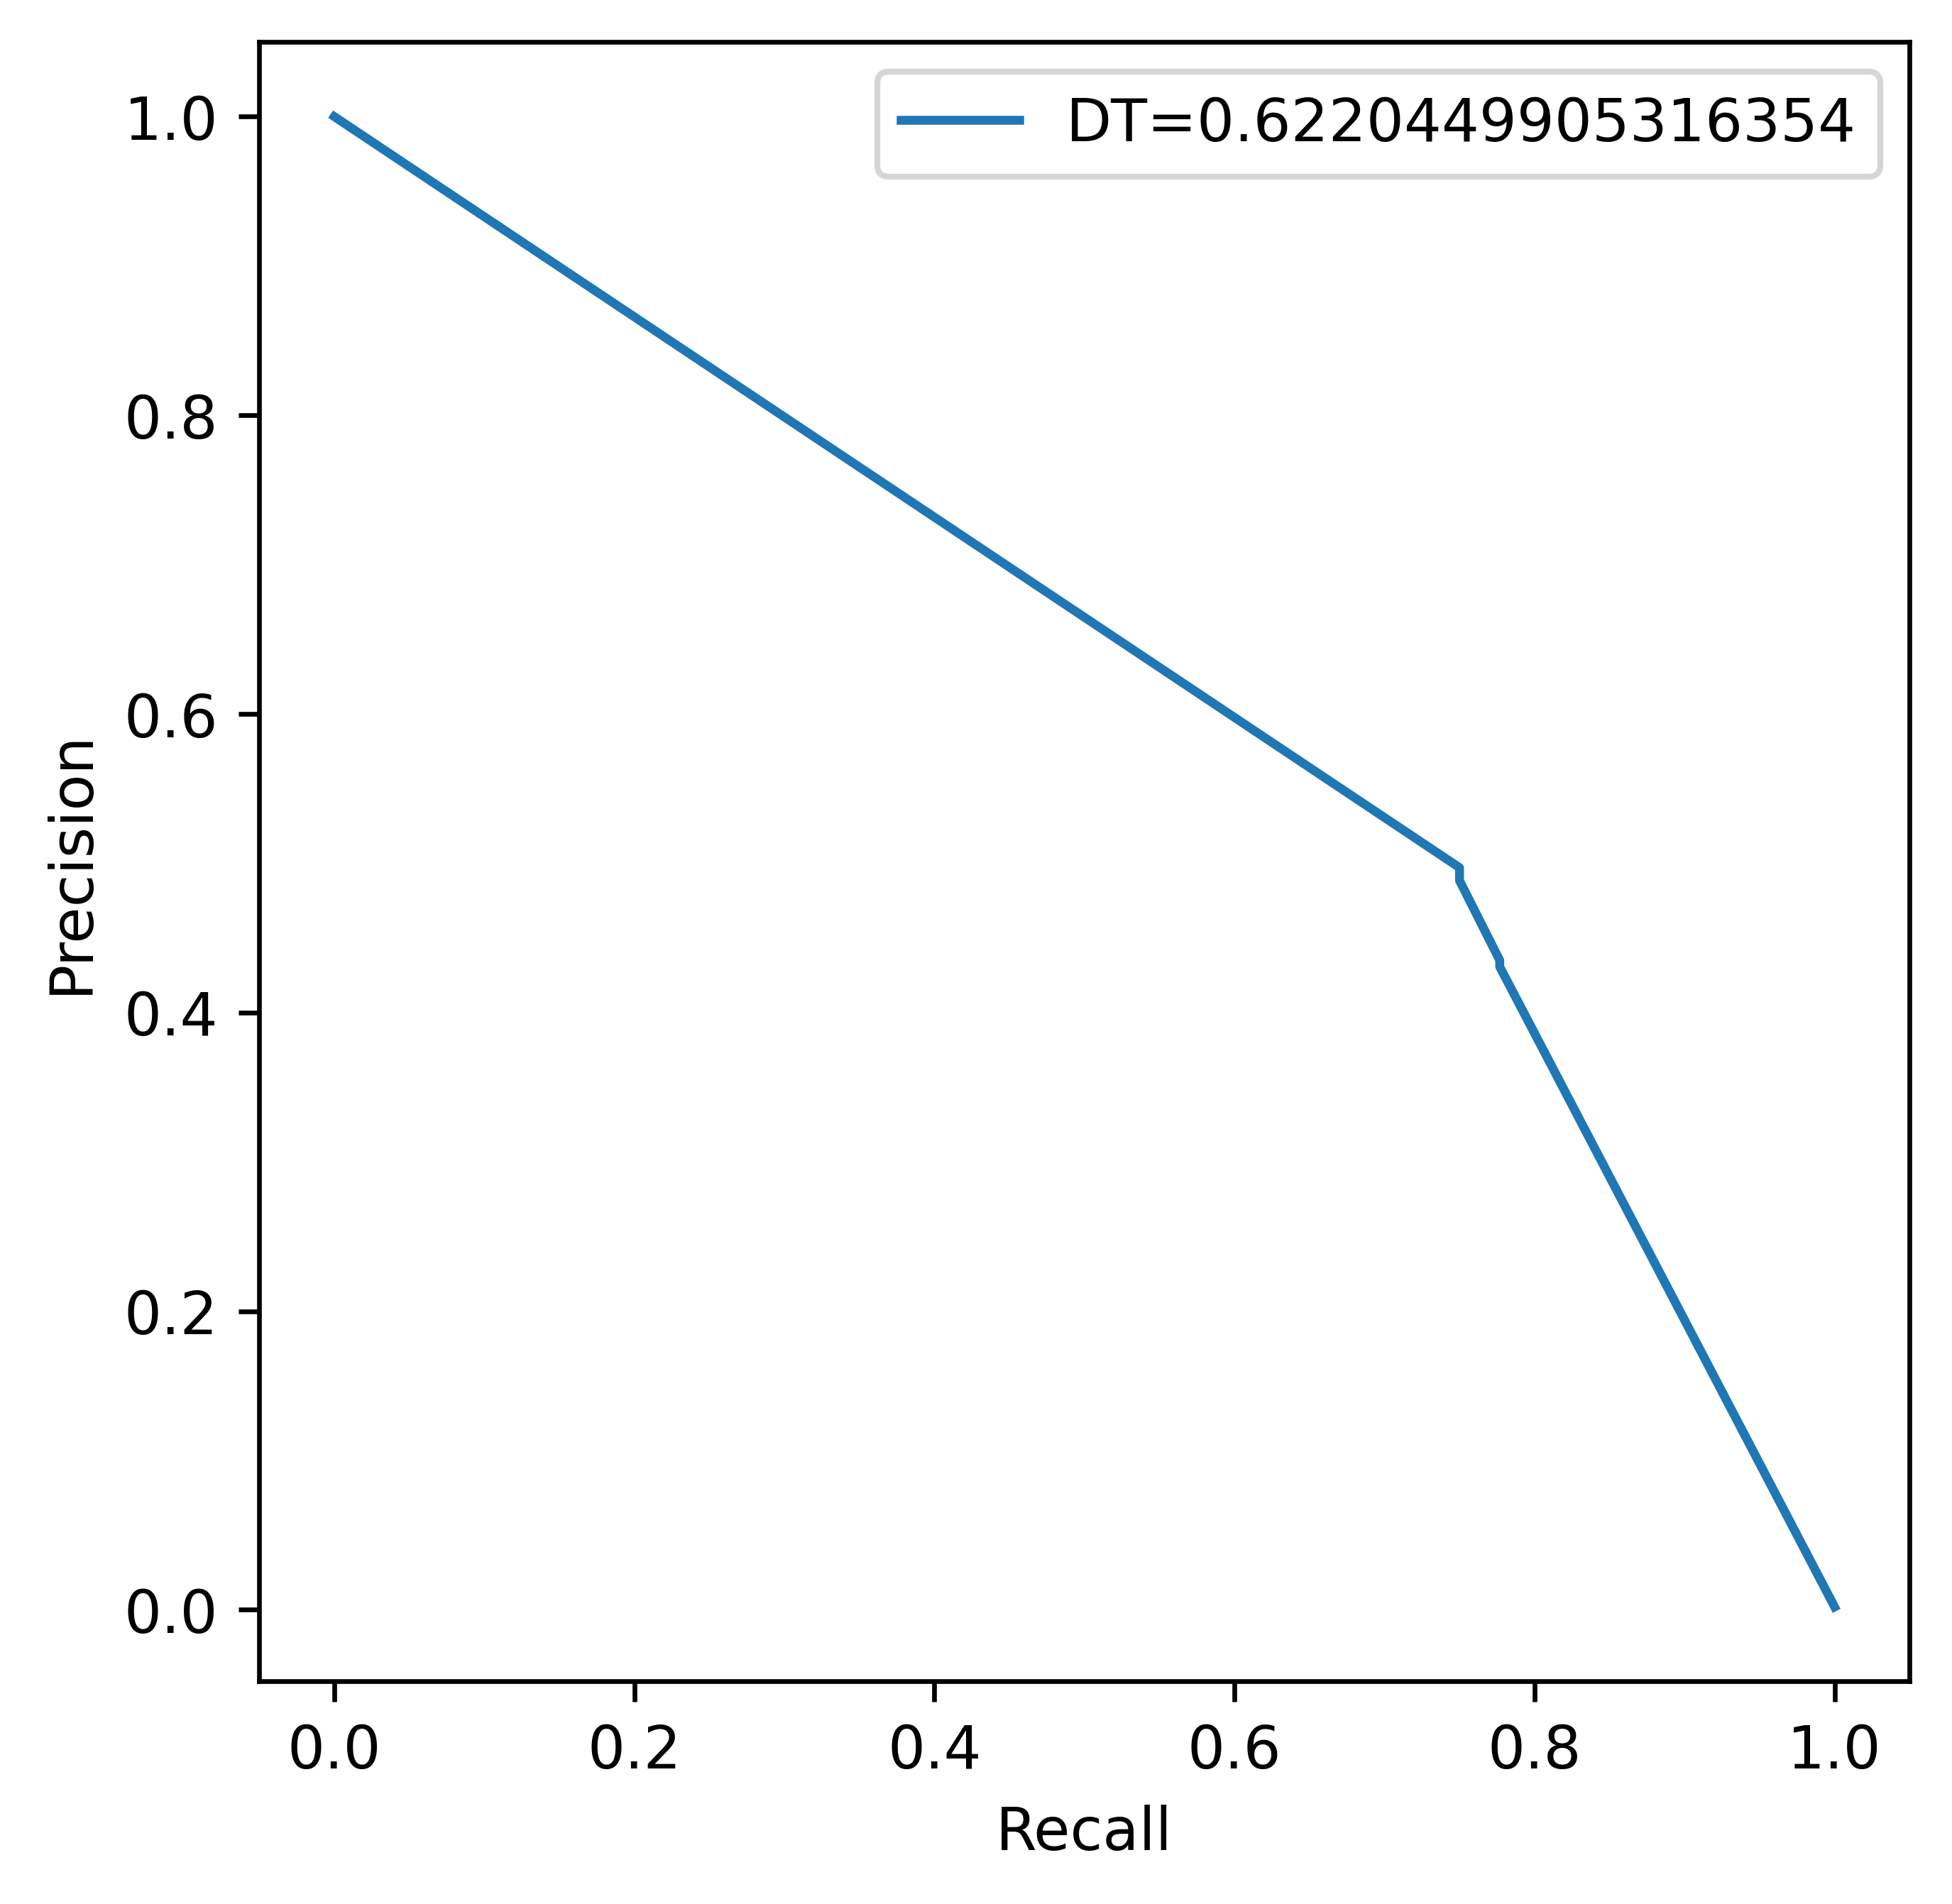

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=classify_.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
plt.figure(figsize=(5, 5), dpi=600)

plt.plot(recall_rf, precision_rf, marker='',label="DT="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time :  1.8389769249999972
Accuracy on Training data : ,  0.9999472446310421
Elapsed time :  0.24833013599993592
Accuracy score on Test data : 0.9993153330290369
Accuracy =  0.9993153330290369
Precision =  0.8476190476190476
Recall =  0.7946428571428571
F1 Score =  0.8202764976958524
[[56834    23]
 [   16    89]]


<Axes: >

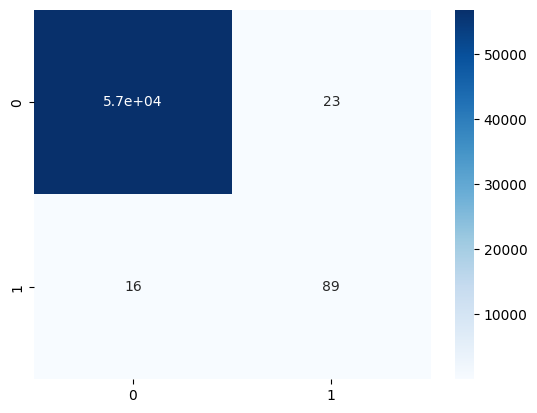

In [37]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
#MLPC = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes=(8, 45, 30), learning_rate= 'adaptive', max_iter= 4000, solver= 'adam')

MLPC.fit(X_train,Y_train)

#Accuracy on training data
start_time = timeit.default_timer()
x_train_prediction = MLPC.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)


training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()
x_test_prediction = MLPC.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

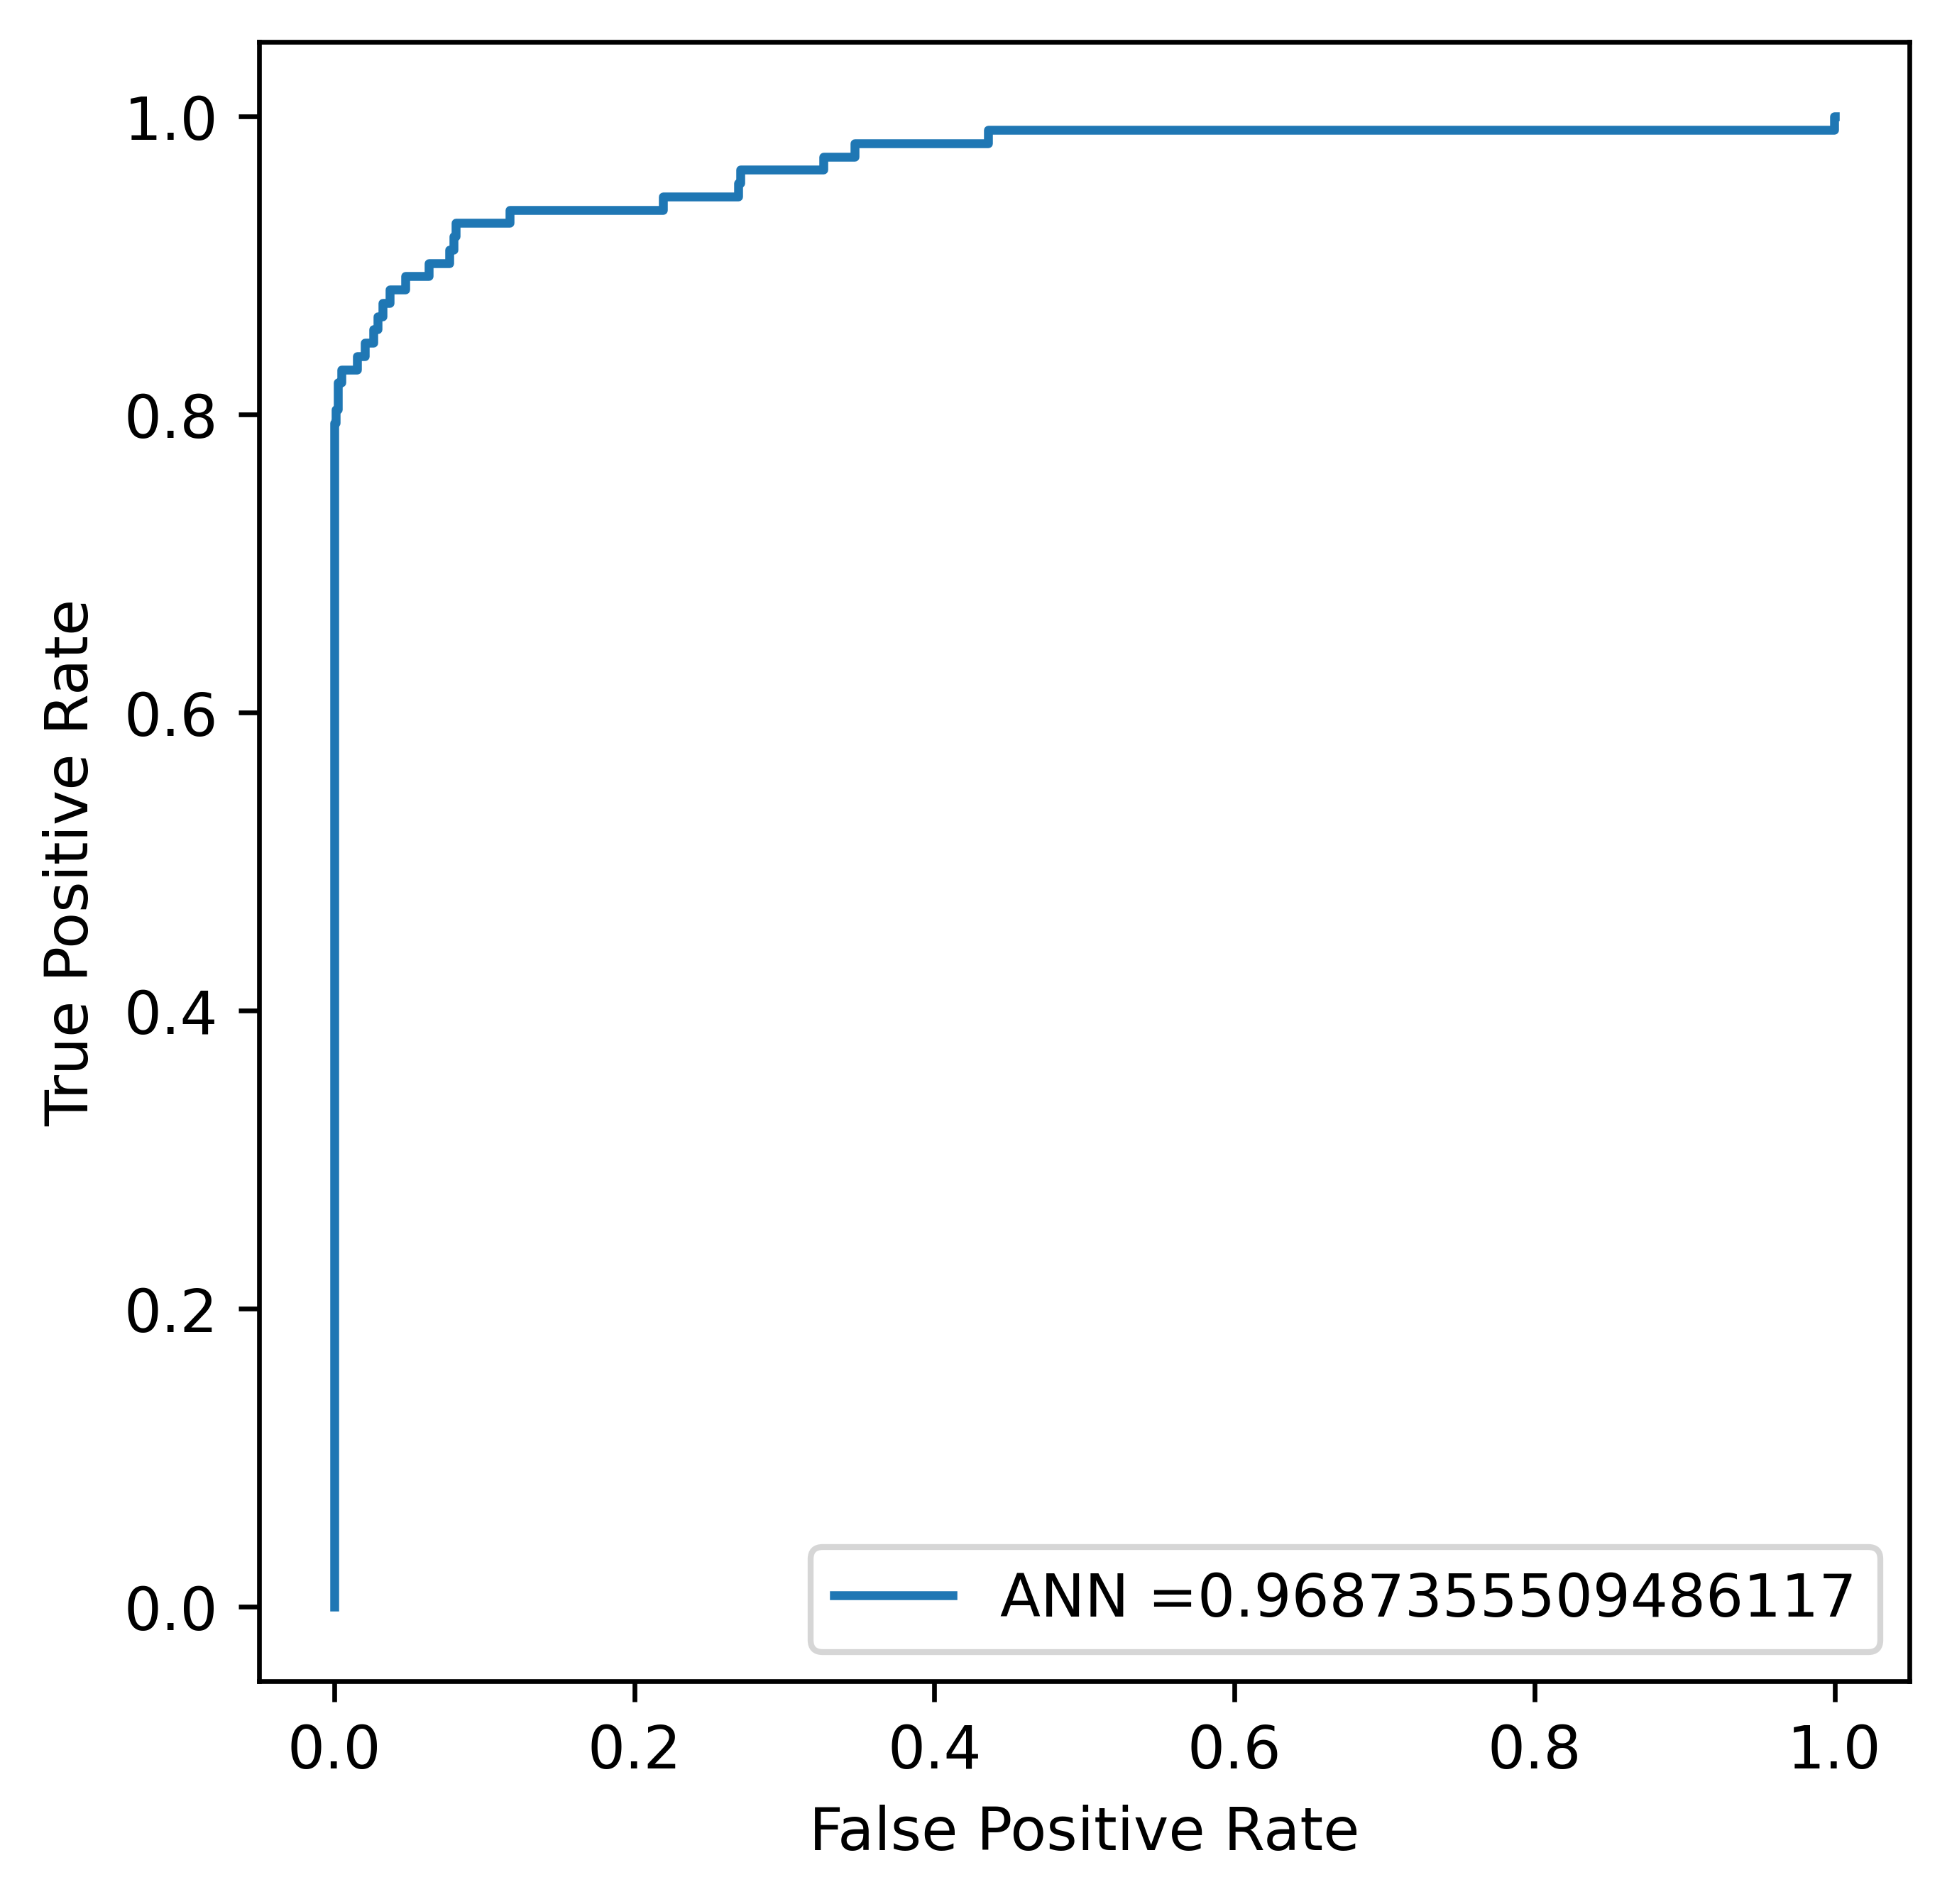

In [38]:
    y_pred_proba_dt = MLPC.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    plt.figure(figsize=(5, 5), dpi=600)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="ANN ="+str(auc_dt))
    
    plt.legend(loc=4)
    plt.show()

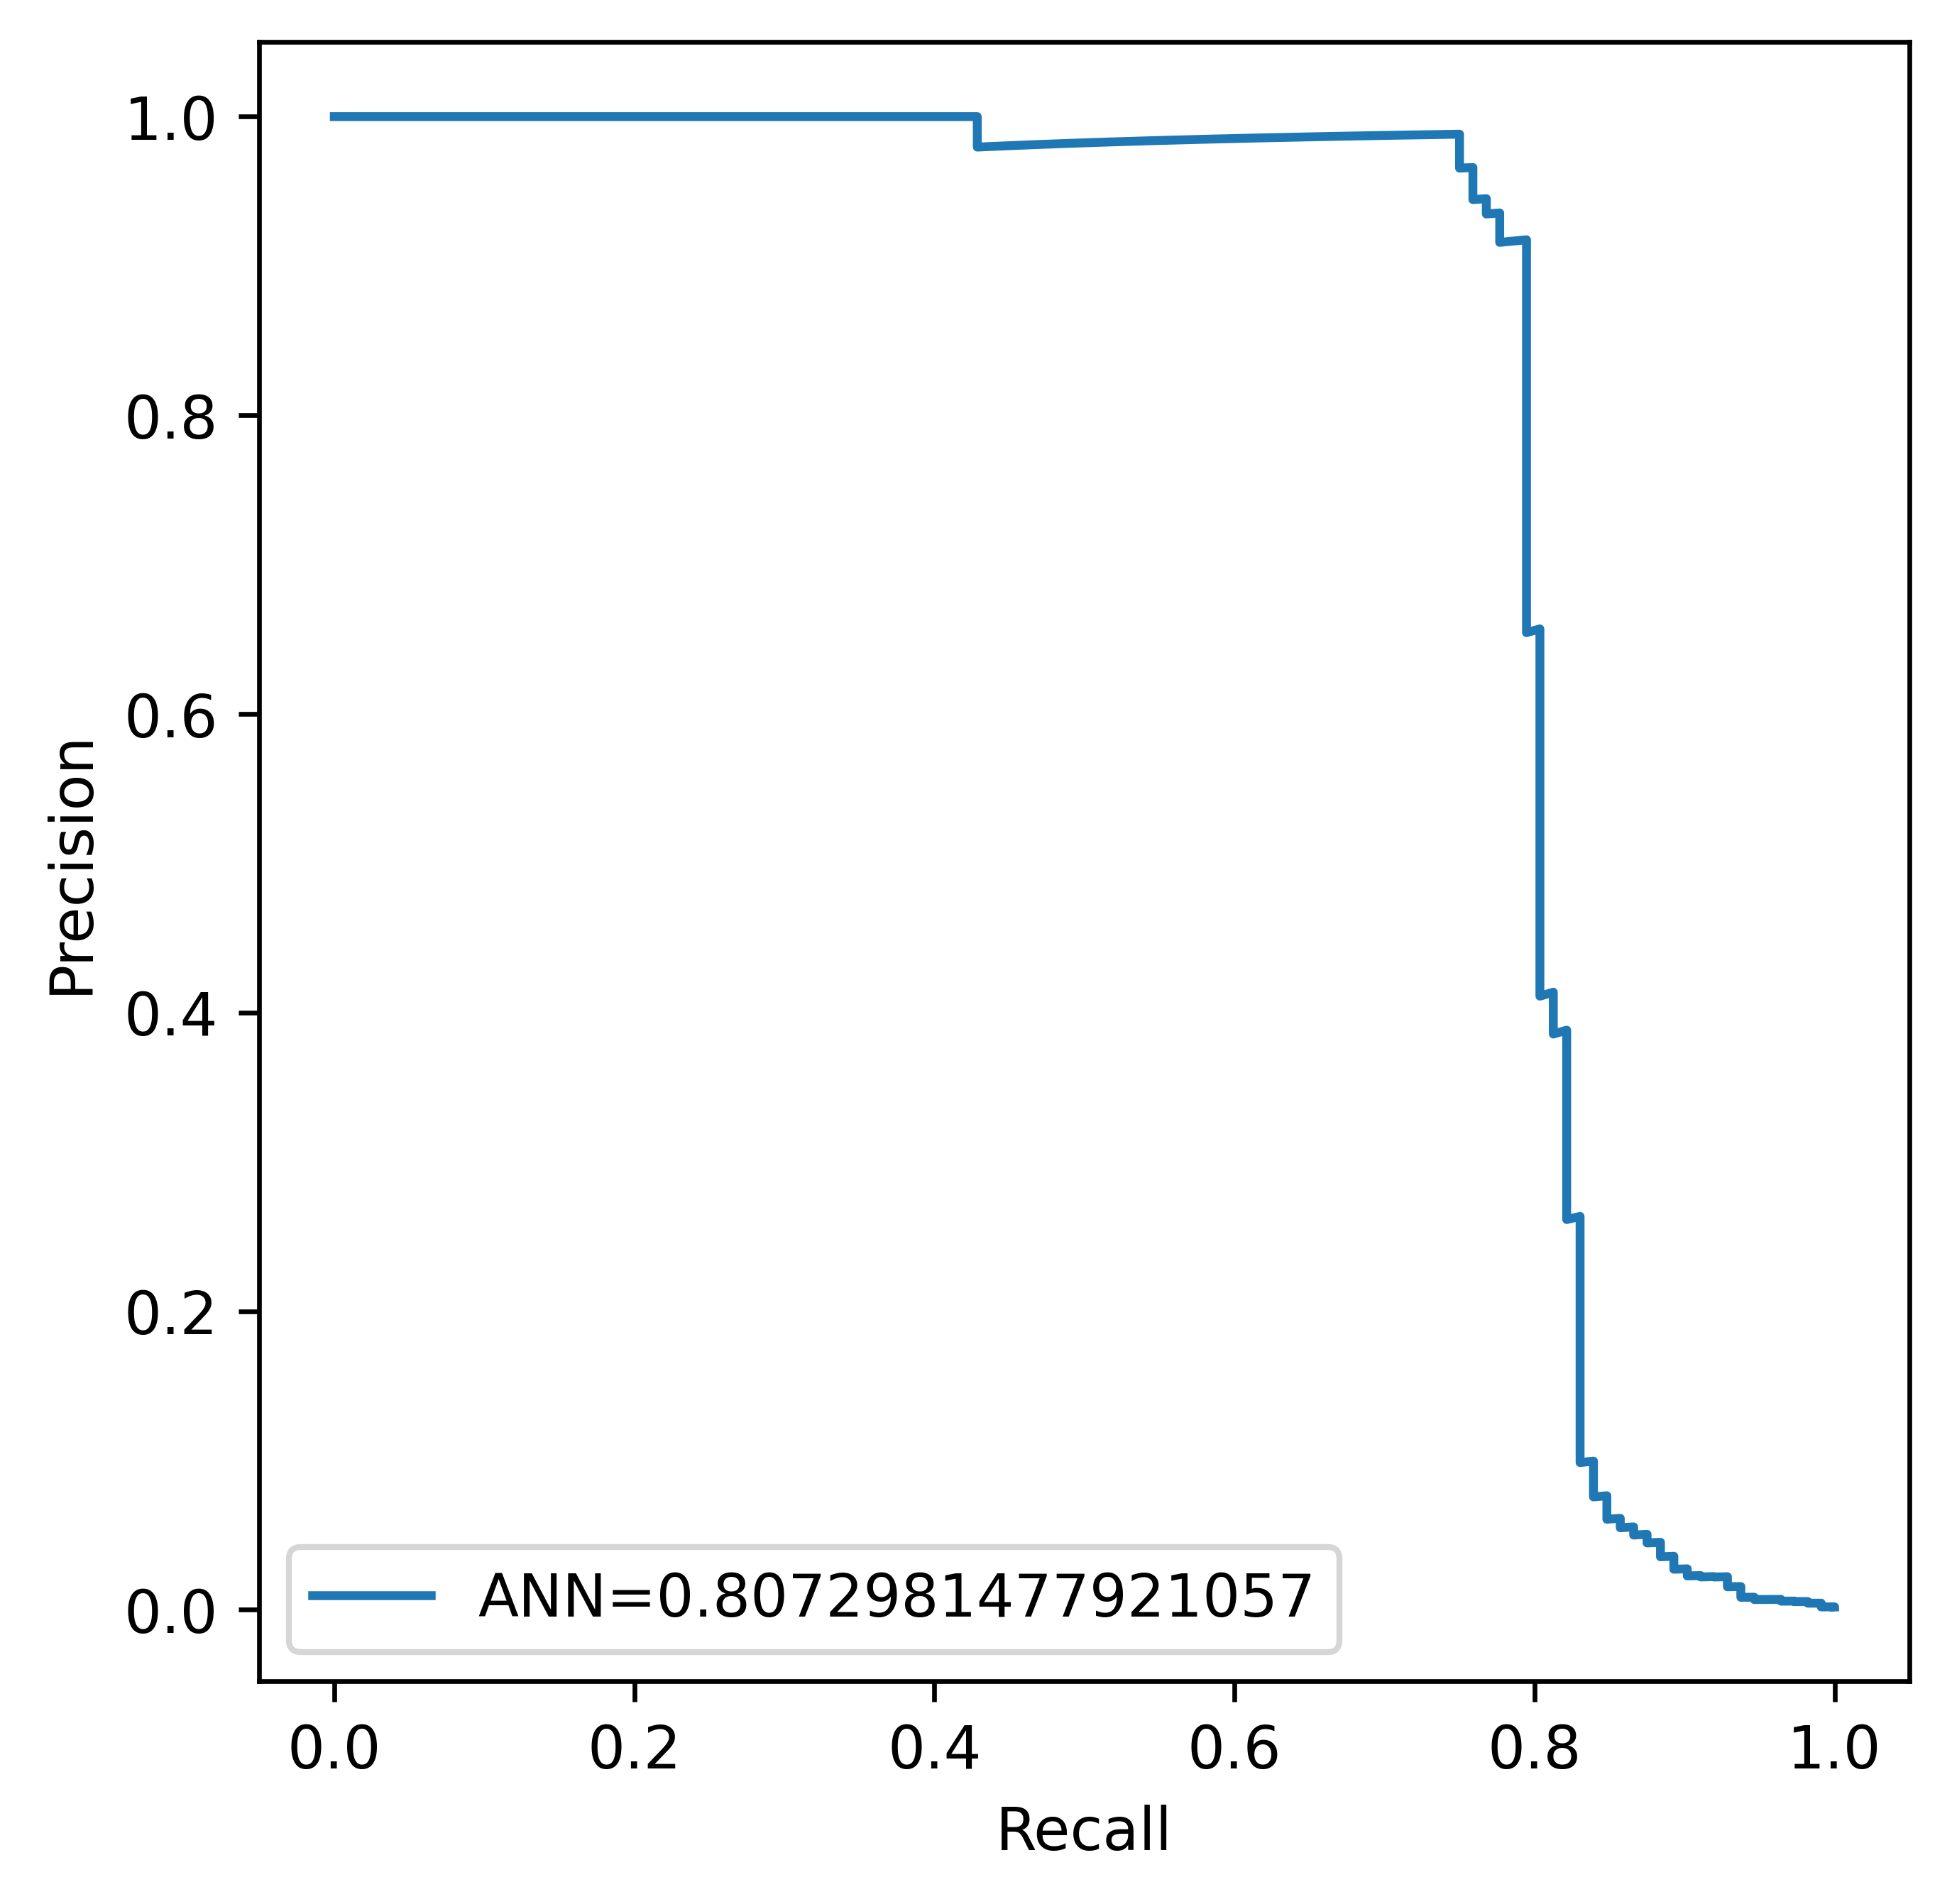

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=MLPC.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
plt.figure(figsize=(5, 5), dpi=600)

plt.plot(recall_rf, precision_rf, marker='',label="ANN="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Elapsed time :  582.5332200260001
Accuracy on Training data : ,  1.0
Elapsed time :  72.98085304699998
Accuracy score on Test data : 0.9993153330290369
Accuracy =  0.9993153330290369
Precision =  0.8230088495575221
Recall =  0.8303571428571429
F1 Score =  0.8266666666666667
[[56830    19]
 [   20    93]]


<Axes: >

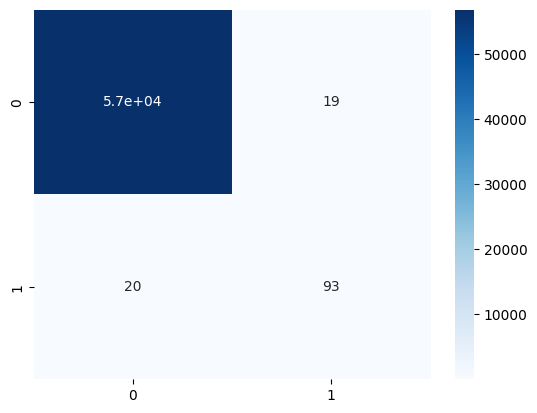

In [40]:
from sklearn.neighbors import KNeighborsClassifier 
#knn = KNeighborsClassifier(n_neighbors =3)
knn = KNeighborsClassifier(n_neighbors= 2,metric='minkowski',weights='uniform',algorithm='auto',leaf_size=2)

knn.fit(X_train,Y_train)

#Accuracy on training data
start_time =timeit.default_timer()
x_train_prediction = knn.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 

start_time =timeit.default_timer()
x_test_prediction  = knn.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

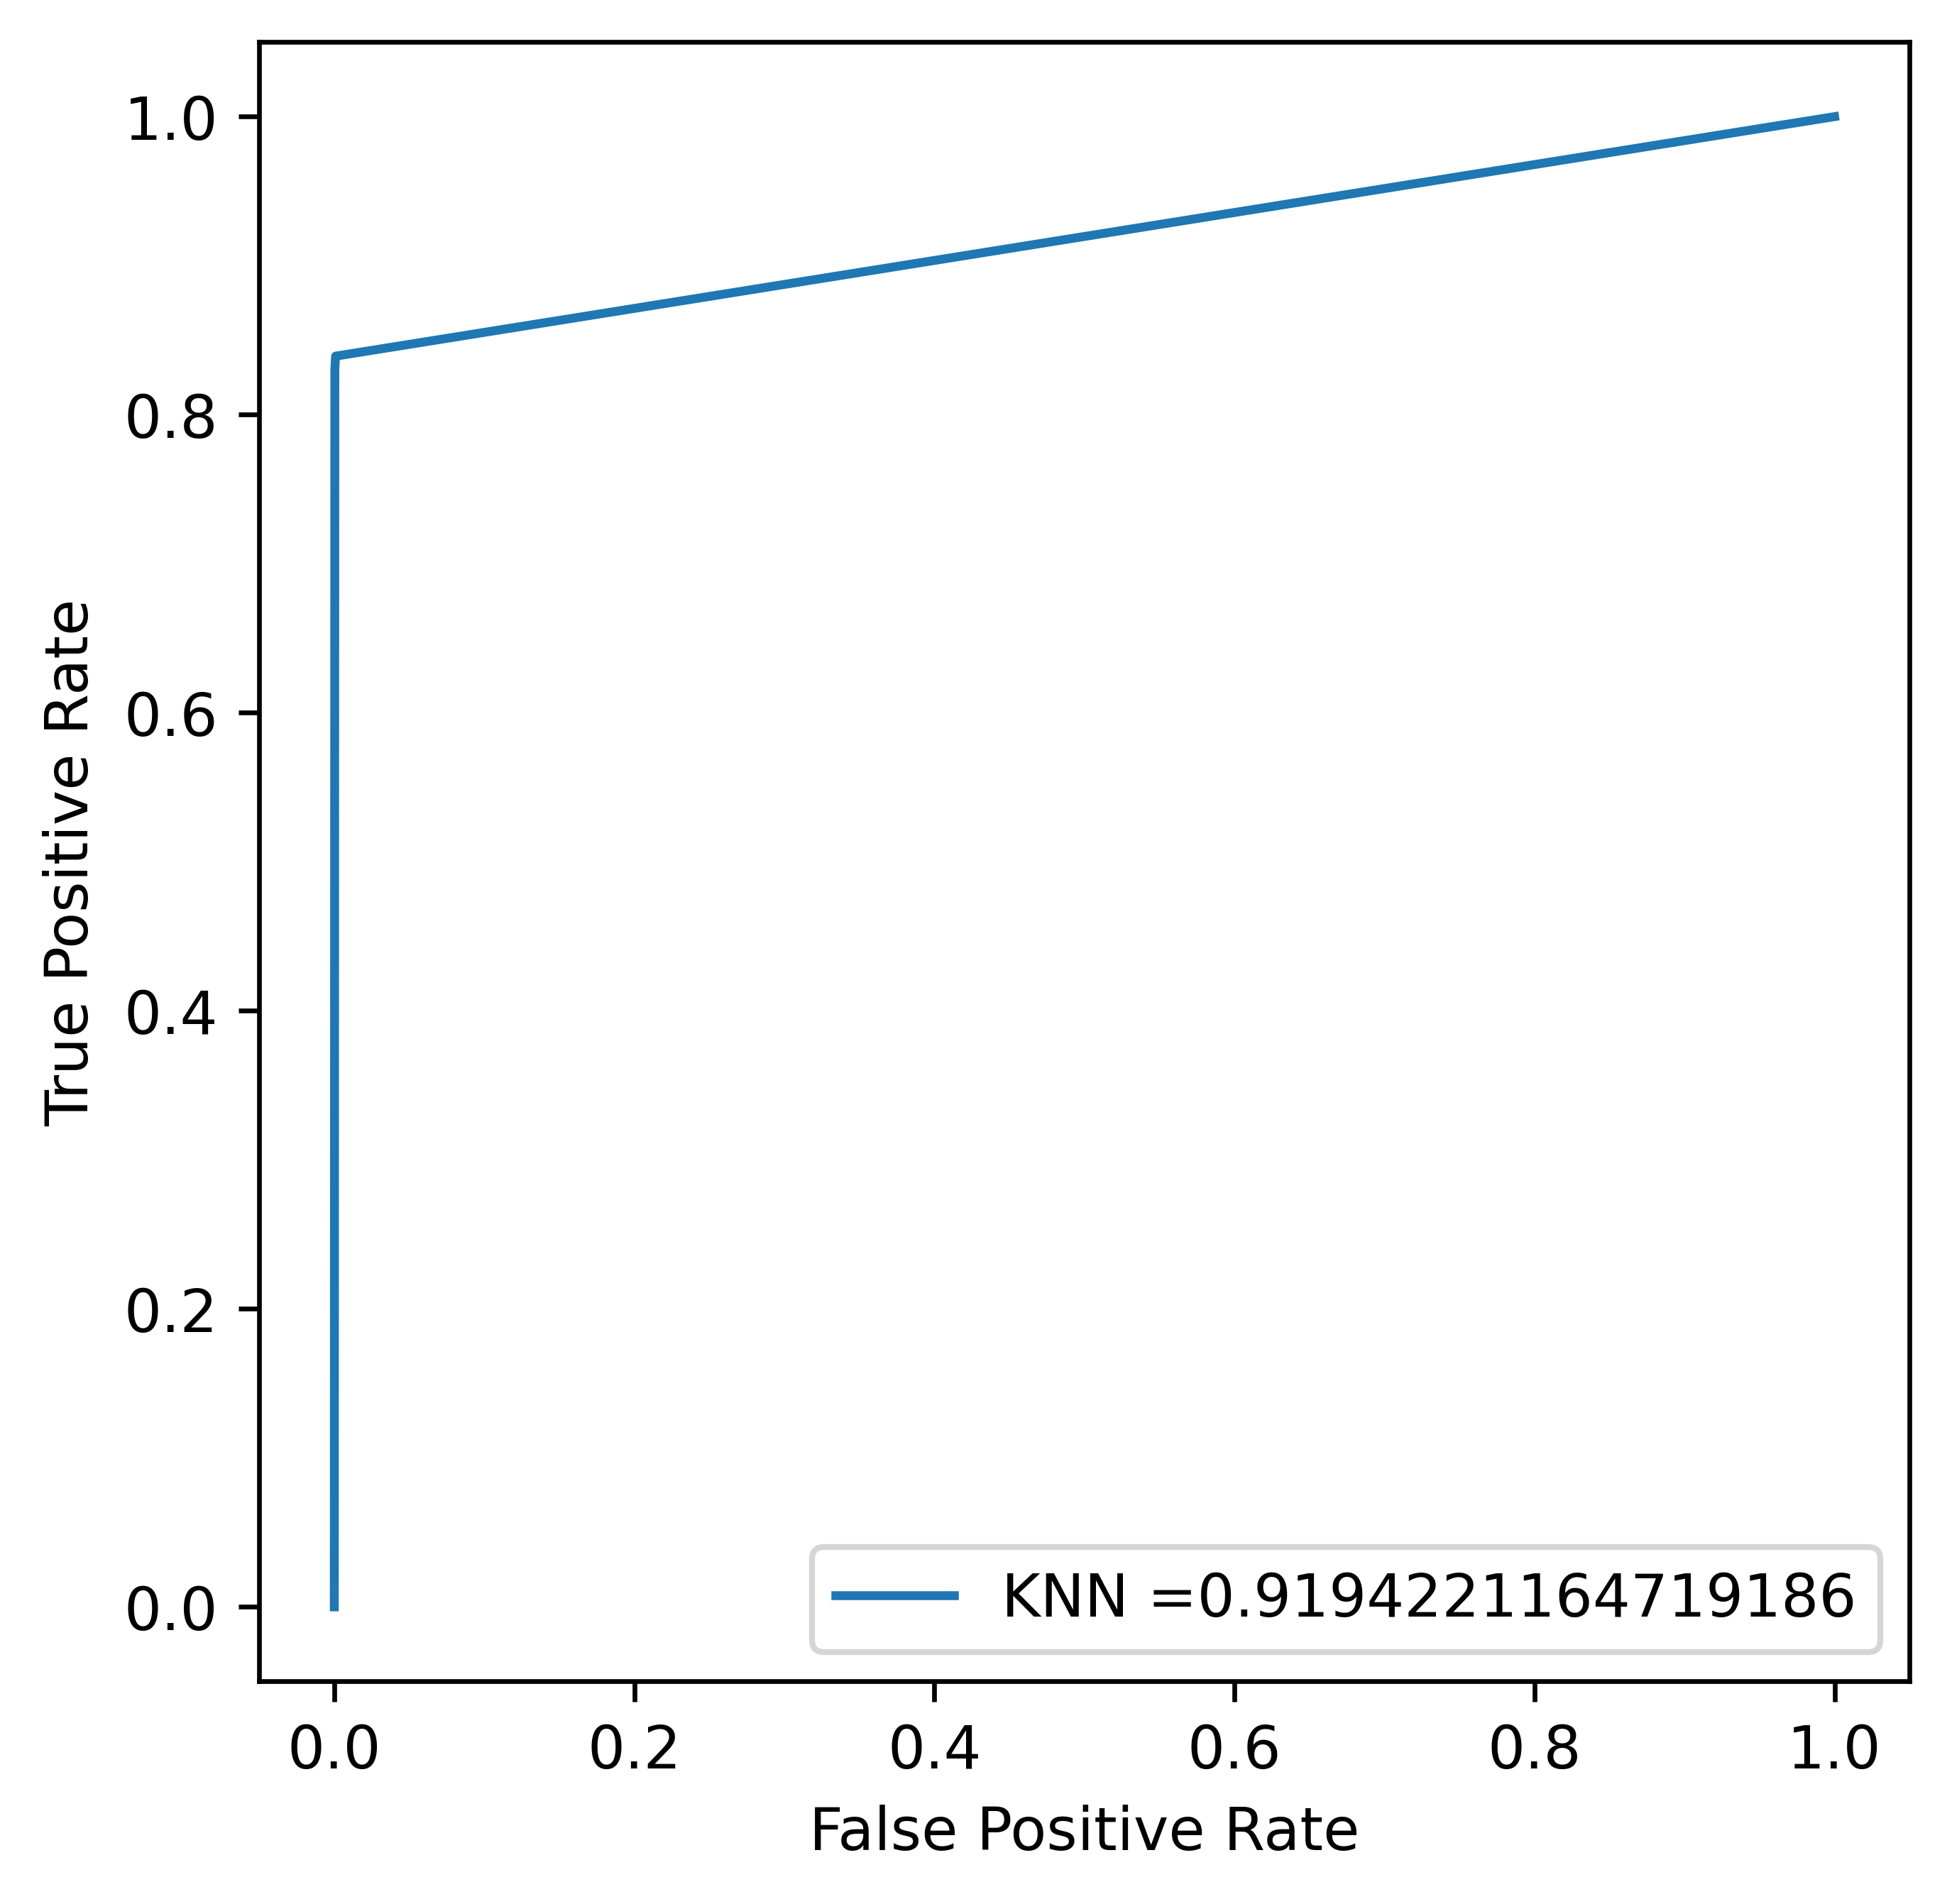

In [41]:
    y_pred_proba_dt = knn.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)    
    plt.figure(figsize=(5, 5), dpi=600)

    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="KNN ="+str(auc_dt))
    
    plt.legend(loc=4)
    plt.show()

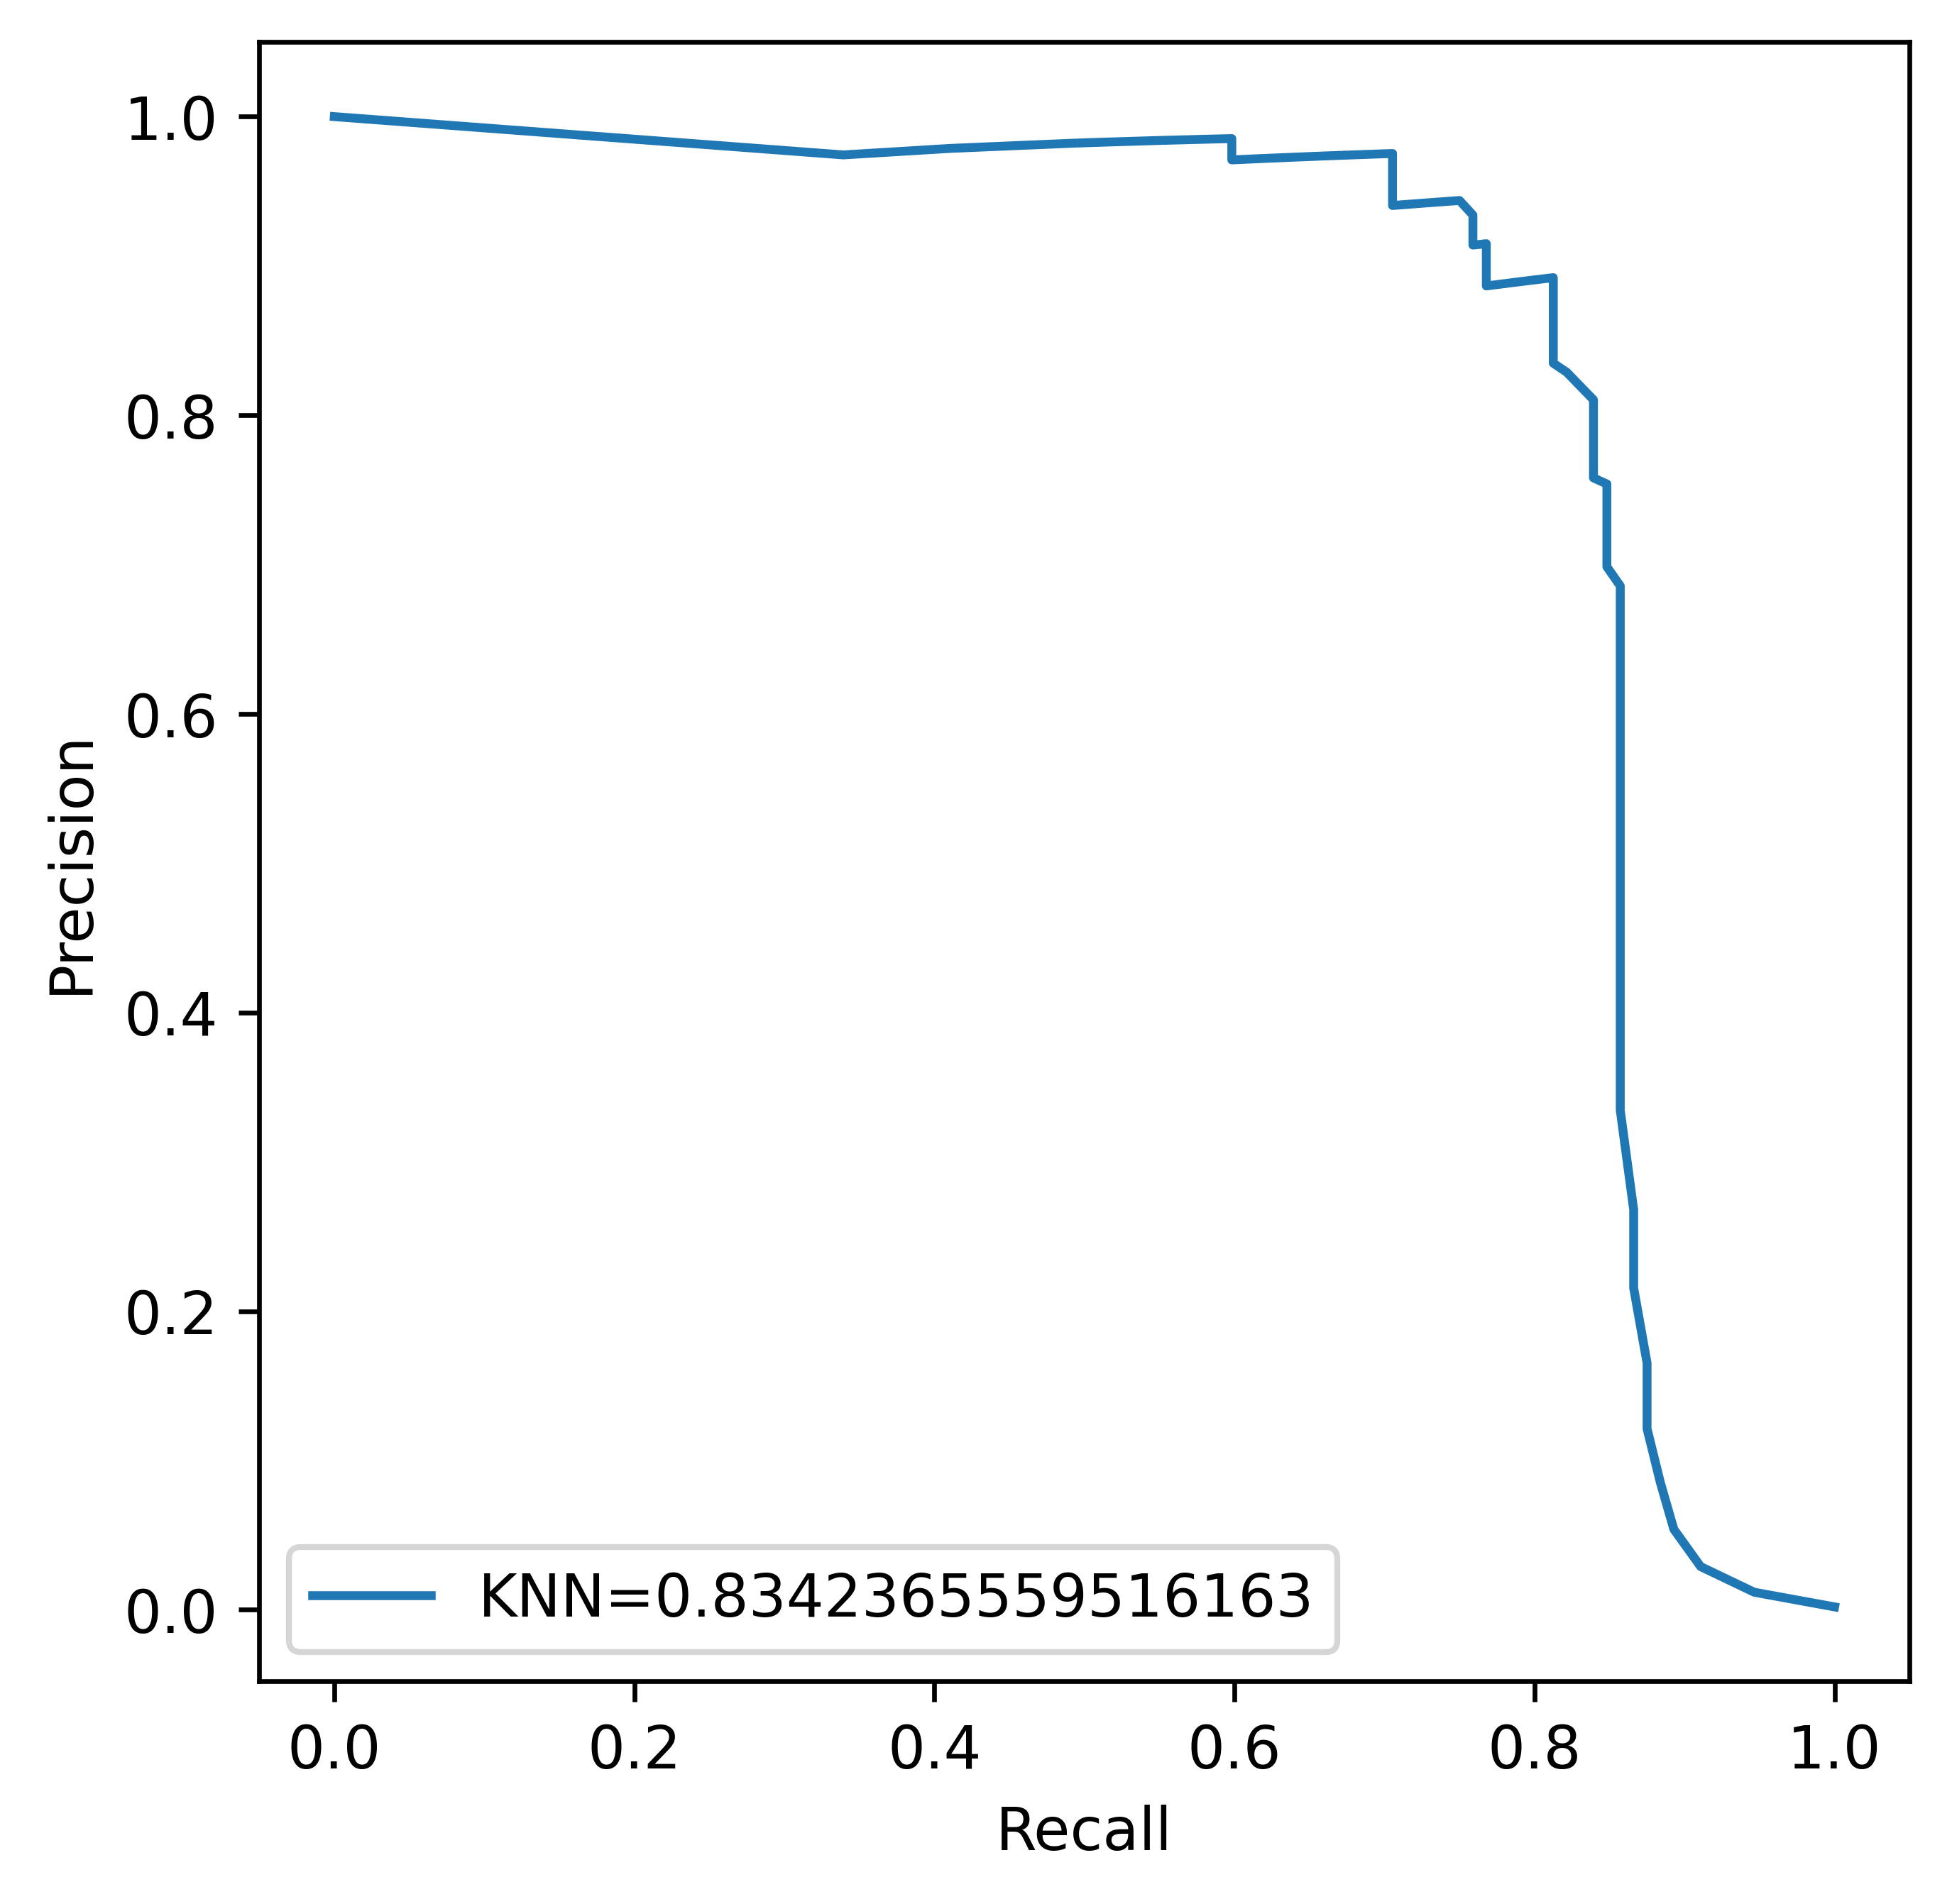

In [42]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
plt.figure(figsize=(5, 5), dpi=600)

plt.plot(recall_rf, precision_rf, marker='',label="KNN="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.show()

In [ ]:
    y_pred_proba_dt = classify_.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    y_pred_proba_xb = model.predict_proba(X_test)[:, 1]
    fpr_xb, tpr_xb, thresholds = roc_curve(Y_test,  y_pred_proba_xb)
    auc_xb = roc_auc_score(Y_test, y_pred_proba_xb)
    
    y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds = roc_curve(Y_test,  y_pred_proba_rf)
    auc_rf = roc_auc_score(Y_test, y_pred_proba_rf)
    
    y_pred_proba_ann = MLPC.predict_proba(X_test)[:, 1]
    fpr_ann, tpr_ann, thresholds = roc_curve(Y_test,  y_pred_proba_ann)
    auc_ann = roc_auc_score(Y_test, y_pred_proba_ann)
    
    y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
    fpr_knn, tpr_knn, thresholds = roc_curve(Y_test,  y_pred_proba_knn)
    auc_knn = roc_auc_score(Y_test, y_pred_proba_knn)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="DT ="+str(auc_dt))
    plt.plot(fpr_xb,tpr_xb,linestyle='dotted',label="XGBoost ="+str(auc_xb))
    plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="RF ="+str(auc_rf))
    plt.plot(fpr_ann,tpr_ann,linestyle='-.',label="ANN ="+str(auc_ann))
    plt.plot(fpr_knn,tpr_knn,linestyle='dashdot',label="KNN ="+str(auc_knn))
    plt.title("ROC-AUC Curve for PCA")
    plt.legend(loc=4)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.show()

# Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
y_test_prob_xb=model.predict_proba(X_test)[:,1]
precision_xb, recall_xb,_ =precision_recall_curve(Y_test, y_test_prob_xb)
auc_score_xb=metrics.auc(recall_xb, precision_xb)
y_test_prob_dt=classify_.predict_proba(X_test)[:,1]
precision_dt, recall_dt,_ =precision_recall_curve(Y_test, y_test_prob_dt)
auc_score_dt=metrics.auc(recall_dt, precision_dt)
y_test_prob_knn=knn.predict_proba(X_test)[:,1]
precision_knn, recall_knn,_ =precision_recall_curve(Y_test, y_test_prob_knn)
auc_score_knn=metrics.auc(recall_knn, precision_knn)
y_test_prob_ann=MLPC.predict_proba(X_test)[:,1]
precision_ann, recall_ann,_ =precision_recall_curve(Y_test, y_test_prob_ann)
auc_score_ann=metrics.auc(recall_ann, precision_ann)
plt.plot(recall_rf, precision_rf, marker='',label="RFC="+str(auc_score_rf))
plt.plot(recall_knn, precision_knn, marker='',label="KNN="+str(auc_score_knn))
plt.plot(recall_ann, precision_ann, marker='',label="ANN="+str(auc_score_ann))
plt.plot(recall_dt, precision_dt, marker='',label="DTC="+str(auc_score_dt))
plt.plot(recall_xb, precision_xb, marker='',label="XGBC="+str(auc_score_xb))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.figure(figsize=(5,5))
plt.show()